In [1]:
from database import Database
from Filter.PB import PB
from Filter.MA import MA
from Filter.PB_MA import PB_MA
from Filter.Higher_Market import Higher_Market
from Filter.DoubleRateRise import DoubleRateRise
from Filter.ROE_H_PB_L import ROE_H_PB_L
from Filter.Chips import Chips
from Filter.GetFilterData import GetFilterData
from Utils.GetExtraX import GetExtraX
from FeatureSelect.FeatureSelect import FeatureSelect
from FeatureSelect.FeatureXMLGenerate import FeatureXMLGenerate
from Draw.StockDataVisualizer import StockDataVisualizer
from Draw.FeatureVisualizer import FeatureVisualizer
# from Analysis.Analysis import Analysis

# draw = Draw()
# analysis = Analysis()

In [2]:
class DataStorage:
    def __init__(self):
        self.filtered_data = None
        self.features = None

In [3]:
def F_Draw(filtered_data,features,*xml):
    key_list = list(features.keys())
    FeatureVisualizer(filtered_data,key_list,*xml)

In [4]:
def Analysis(func_name,start_d,end_d,*xml):
    data_storage = DataStorage()
    # 讀取資料
    db = Database()
    # #TODO:一次取完變成data?
    # stock_data = db.get_stock(start_d,end_d).drop('id', axis=1)
    company_data =db.get_company_basic()
    q_data=db.get_finance_report_q()
    m_data=db.get_finance_report_m()
    s_data = db.get_stock(start_d,end_d)
    mk_data = db.get_market_index(start_d,end_d)
    ch_data = db.get_chips(start_d,end_d)

    #選擇策略+防呆
    if func_name == "F_PB":
        selected_companies = PB(q_data)

    elif func_name == "F_DoubleRateRise":
        selected_companies = DoubleRateRise(q_data,start_d)
        
    elif func_name == "F_Chips":
        selected_companies = Chips(ch_data,*xml)

    elif func_name == "F_MA":
        selected_companies = MA(s_data)

    elif func_name == "F_PB_MA":
        selected_companies = PB_MA(q_data,start_d,s_data)
        
    elif func_name == "F_Higher_Market":
        selected_companies = Higher_Market(s_data,company_data,mk_data,start_d,end_d)

    elif func_name == "F_ROE_H_PB_L":
        selected_companies = ROE_H_PB_L(q_data,company_data)

    else:
        return "請選擇合適篩選標準"
    combine = GetFilterData(company_data,m_data,q_data,s_data,mk_data,ch_data,selected_companies,start_d,end_d)
    filtered_data=combine.getFliterData()

    import pandas as pd
    with pd.ExcelWriter('filtered_data.xlsx', engine='openpyxl') as writer:
        filtered_data.to_excel(writer, index=False, sheet_name='Sheet1')
    
    print(f"符合條件股數:{len(filtered_data)}")

    visualizer = StockDataVisualizer(filtered_data)
    visualizer.get_heat_map_all()
    visualizer.get_industry_pie_all()
    visualizer.get_bar_chart_all()
   
    if xml:
        addX_data = GetExtraX(filtered_data,xml[0])
    else:
        addX_data = filtered_data

    features = FeatureSelect(addX_data)

    FeatureXMLGenerate(features)
    
    data_storage.features, data_storage.filtered_data = features, filtered_data
    return features, filtered_data
    

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


符合條件股數:46


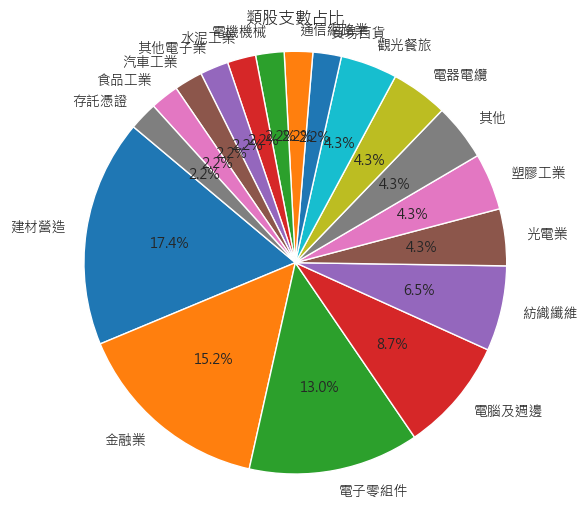

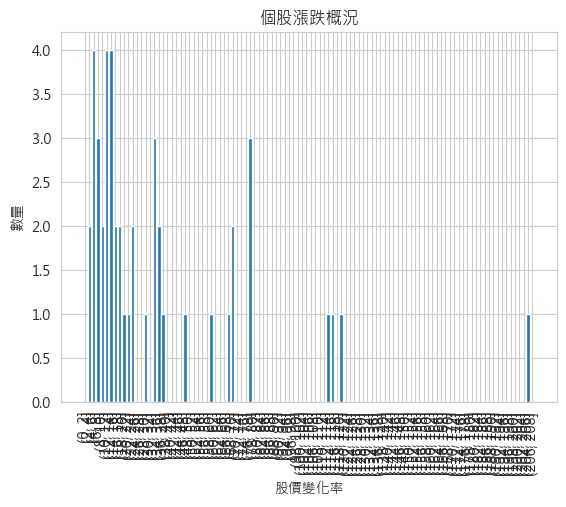

{'最高價當日融資餘額(張)變化': '數值', '最高價當日-券資比': '數值', '最高價當日-融券餘額(張)': '數值', '最高價當日融券餘額(張)變化': '數值', '最高價當日融券餘額(張)變化率': '數值'}


c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\User\Desktop\中央資管\論文\自己的論文\Data_Browsing\FeatureSelect\FeatureSelect.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

In [5]:

# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/01','2023/07/01','XML_chip1031.xml')
#可行的(收盤)
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/04/1','2023/06/30')#1
# features, filtered_data = Analysis("F_Chips",'2023/05/16','2023/06/16','XML_chip.xml')
# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/10/16')#沒有很明顯
features, filtered_data = Analysis("F_PB_MA",'2023/05/16','2023/10/16')#1 換成3*3

#有bug

# features, filtered_data = Analysis("F_ROE_H_PB_L",'2023/04/01','2023/10/16')#1

#不可行

# features, filtered_data = Analysis("F_Higher_Market",'2023/05/16','2023/07/17')# 換成3*3
# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/07/17')#5


#features, filtered_data = Analysis("F_PB_MA",'2023/08/15','2023/10/16')#5


# features, filtered_data = Analysis("F_DoubleRateRise",'2023/05/16','2023/09/16','extraX.xml')
# 執行 Analysis 函式
# analysis_result = Analysis("F_PB", '2023/03/15', '2023/09/15', 'XML_chip1031.xml')


In [6]:
# filtered_data.to_csv('filtered_data.csv', index=False, encoding='utf-8')

In [7]:
# F_Draw(filtered_data,features,'v1TestXML1030.xml')

<Figure size 640x480 with 0 Axes>

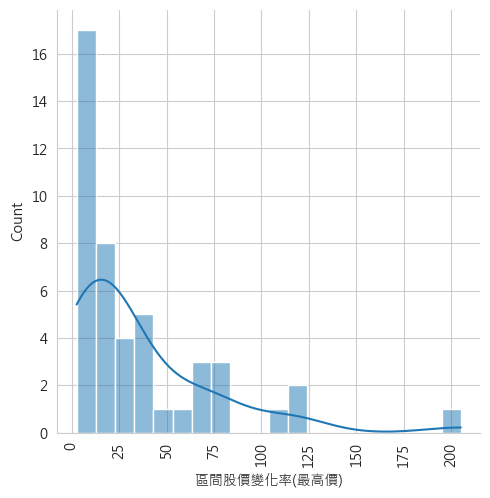

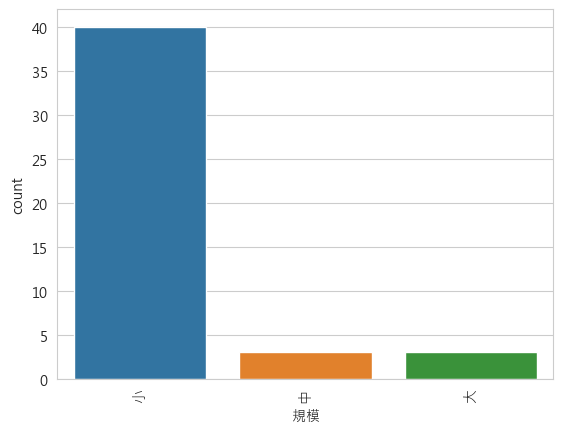

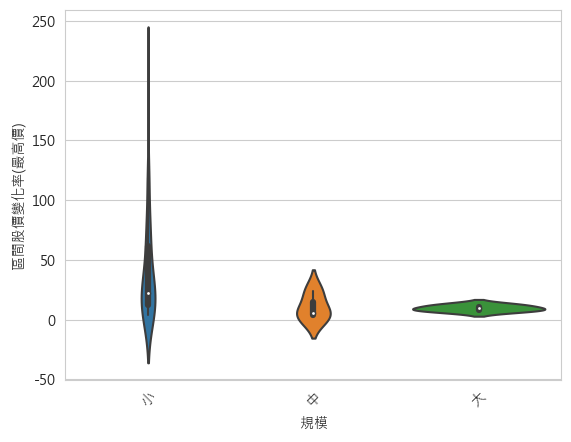

<Figure size 1000x600 with 0 Axes>

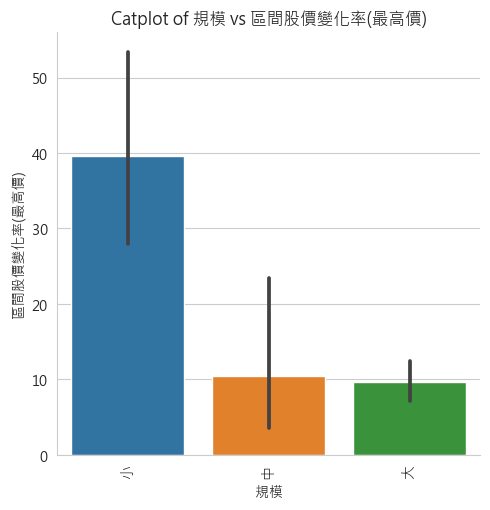

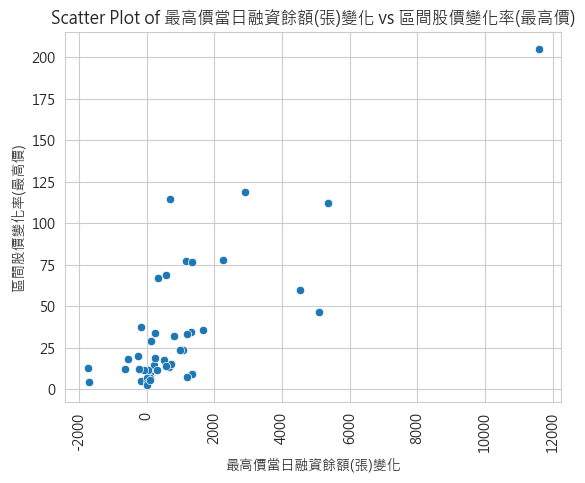

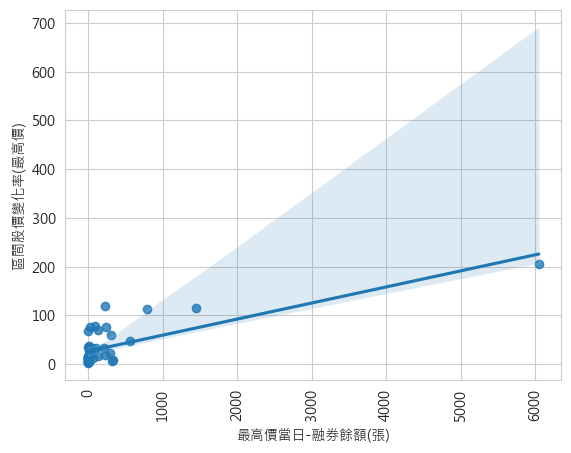

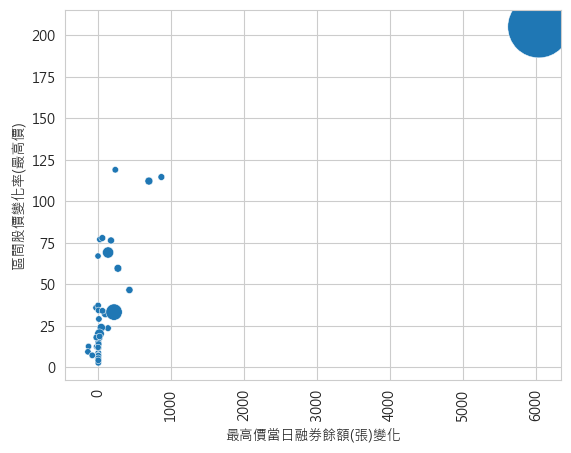

<Figure size 640x480 with 0 Axes>

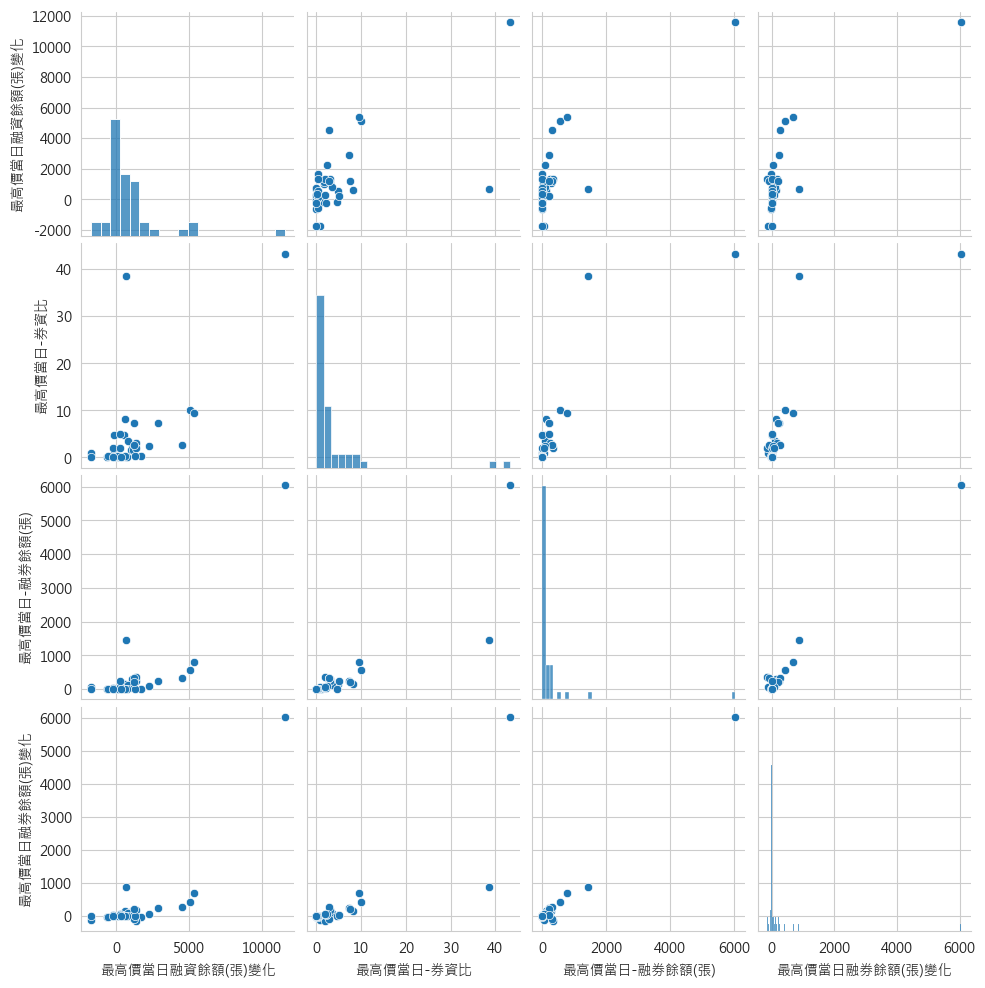

combinations_list
[('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日-融券餘額(張)'), ('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日融券餘額(張)變化'), ('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日融券餘額(張)變化率'), ('最高價當日融資餘額(張)變化', '最高價當日-融券餘額(張)', '最高價當日融券餘額(張)變化'), ('最高價當日融資餘額(張)變化', '最高價當日-融券餘額(張)', '最高價當日融券餘額(張)變化率'), ('最高價當日融資餘額(張)變化', '最高價當日融券餘額(張)變化', '最高價當日融券餘額(張)變化率'), ('最高價當日-券資比', '最高價當日-融券餘額(張)', '最高價當日融券餘額(張)變化'), ('最高價當日-券資比', '最高價當日-融券餘額(張)', '最高價當日融券餘額(張)變化率'), ('最高價當日-券資比', '最高價當日融券餘額(張)變化', '最高價當日融券餘額(張)變化率'), ('最高價當日-融券餘額(張)', '最高價當日融券餘額(張)變化', '最高價當日融券餘額(張)變化率')]
final_combinations
[('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日-融券餘額(張)'), ('最高價當日-券資比', '最高價當日-融券餘額(張)', '最高價當日融資餘額(張)變化'), ('最高價當日-融券餘額(張)', '最高價當日融資餘額(張)變化', '最高價當日-券資比'), ('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日融券餘額(張)變化'), ('最高價當日-券資比', '最高價當日融券餘額(張)變化', '最高價當日融資餘額(張)變化'), ('最高價當日融券餘額(張)變化', '最高價當日融資餘額(張)變化', '最高價當日-券資比'), ('最高價當日融資餘額(張)變化', '最高價當日-券資比', '最高價當日融券餘額(張)變化率'), ('最高價當日-券資比', '最高價當日融券餘額(張)變化率', '最高價當日融資餘額(張)變化'), ('最高價當日融券餘額(張)變化率', '最高價

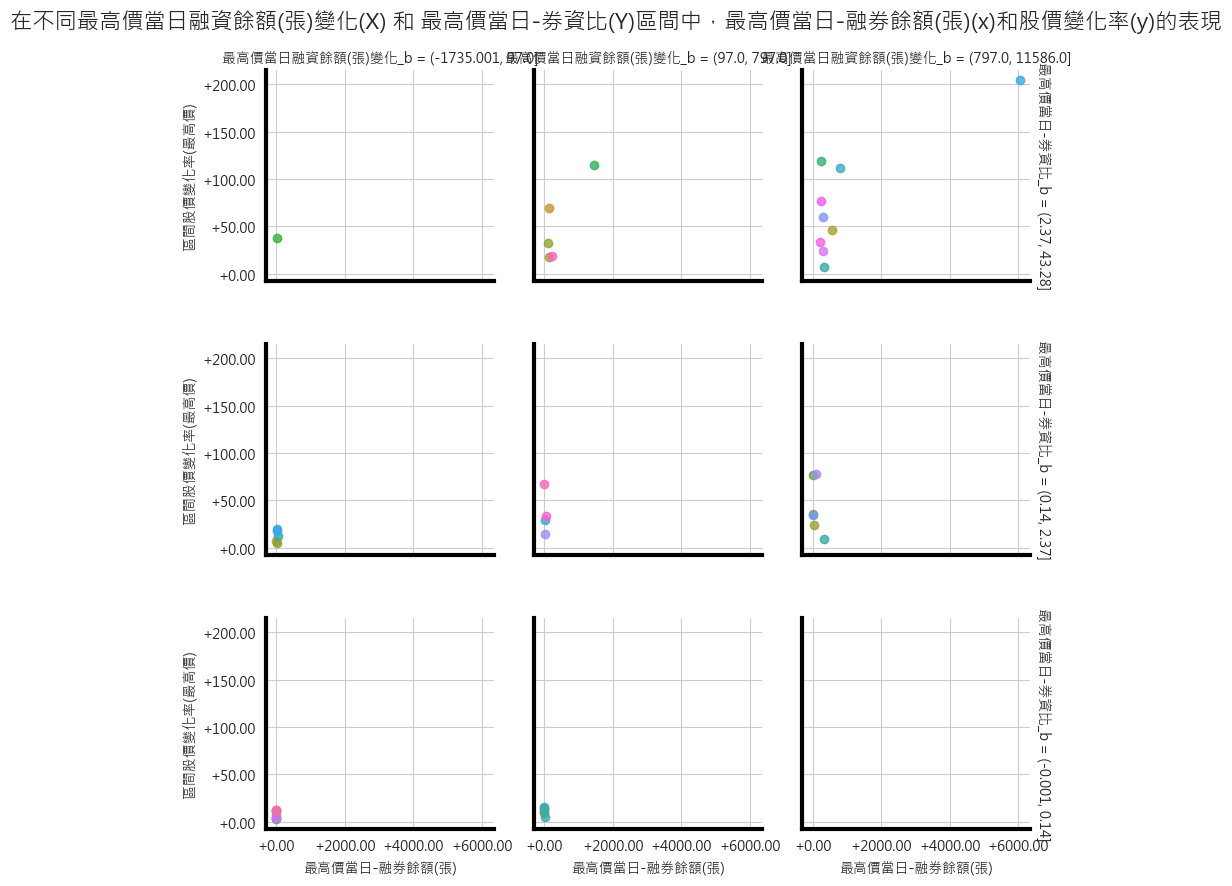

最高價當日-券資比_b
最高價當日-融券餘額(張)_b


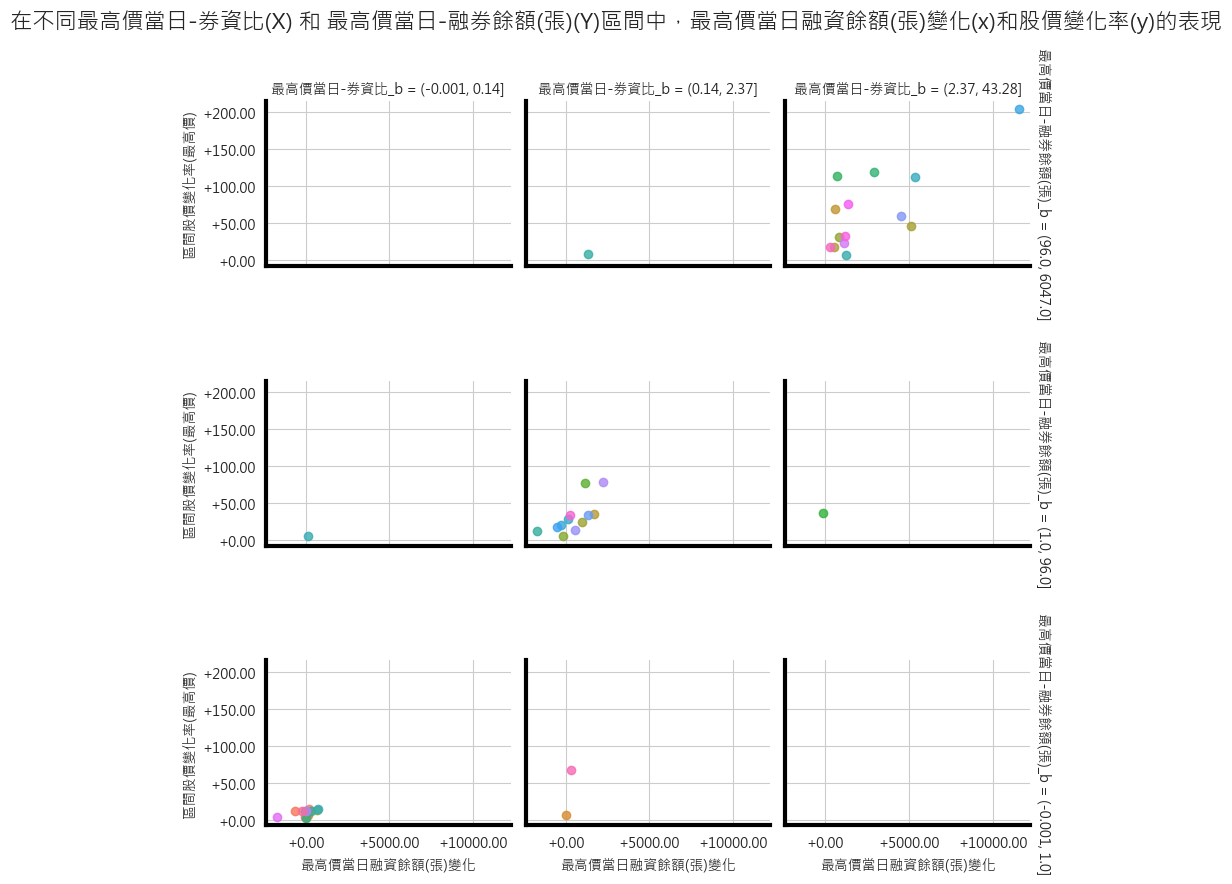

最高價當日-融券餘額(張)_b
最高價當日融資餘額(張)變化_b


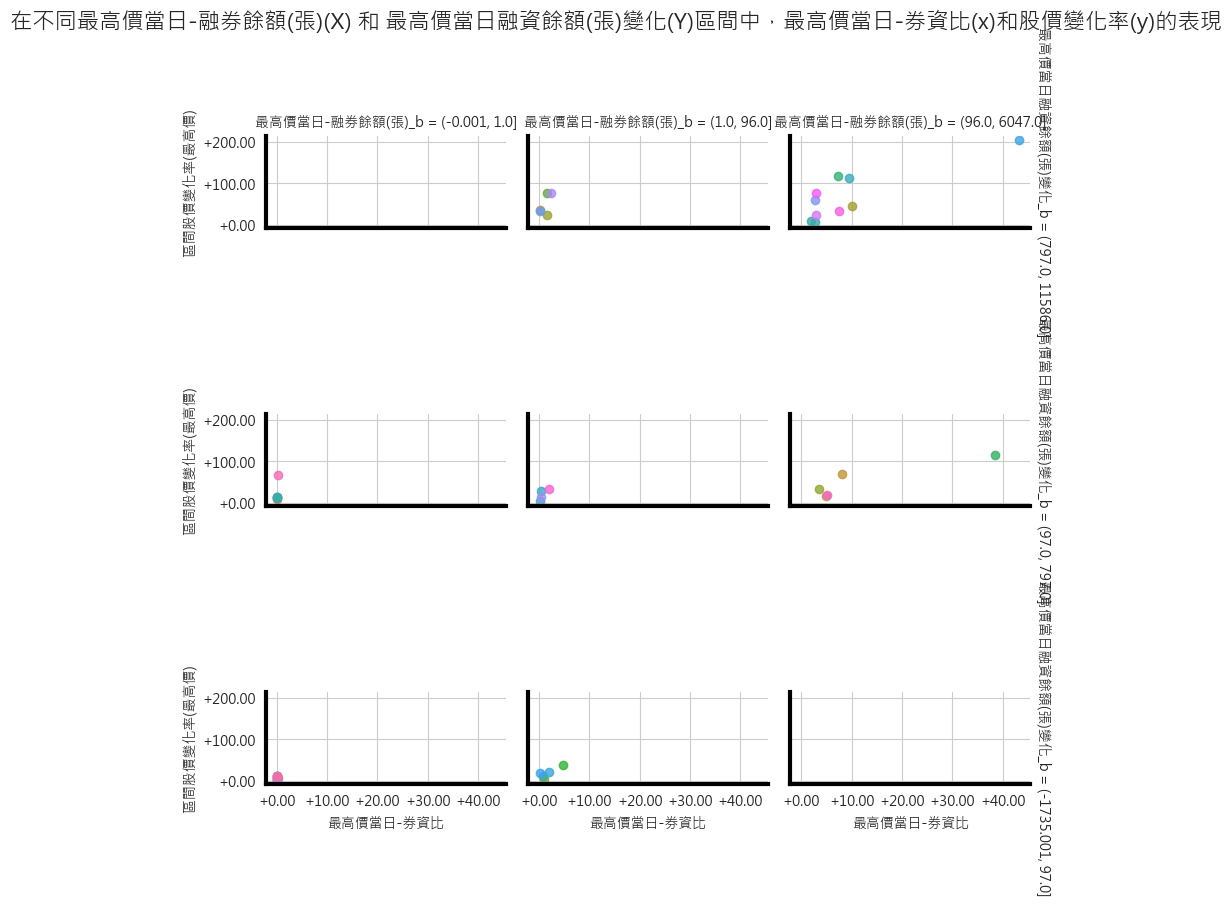

最高價當日融資餘額(張)變化_b
最高價當日-券資比_b


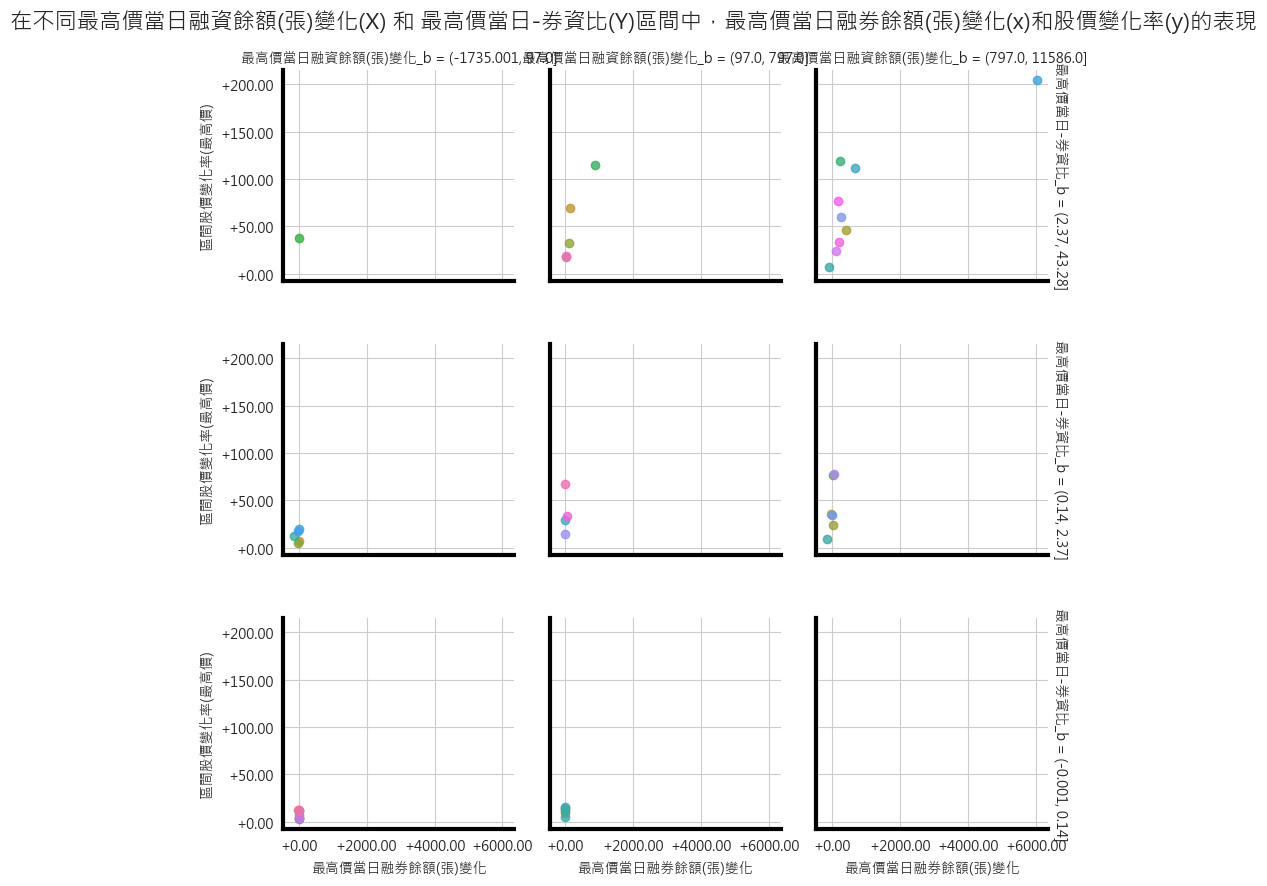

最高價當日-券資比_b
最高價當日融券餘額(張)變化_b


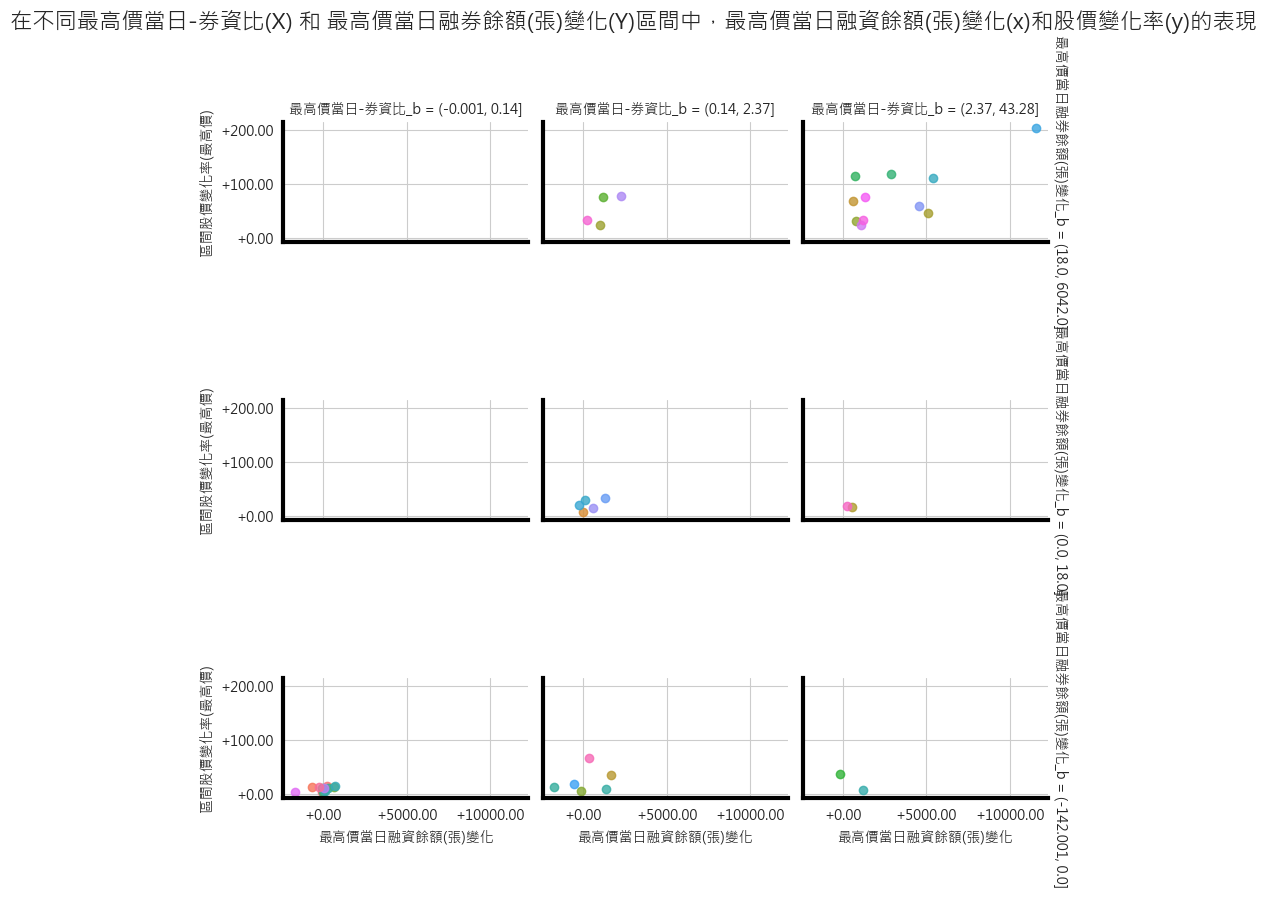

最高價當日融券餘額(張)變化_b
最高價當日融資餘額(張)變化_b


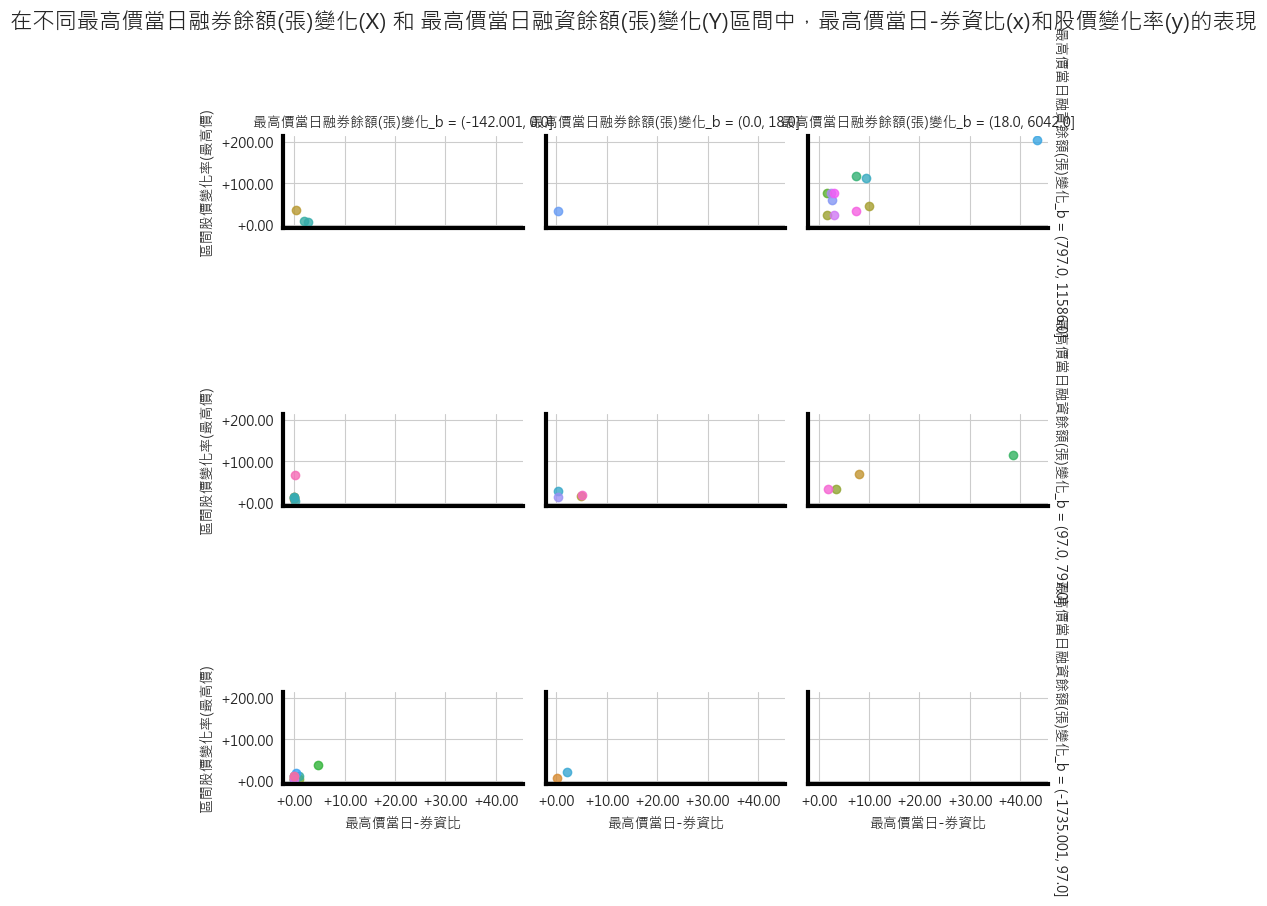

最高價當日融資餘額(張)變化_b
最高價當日-券資比_b


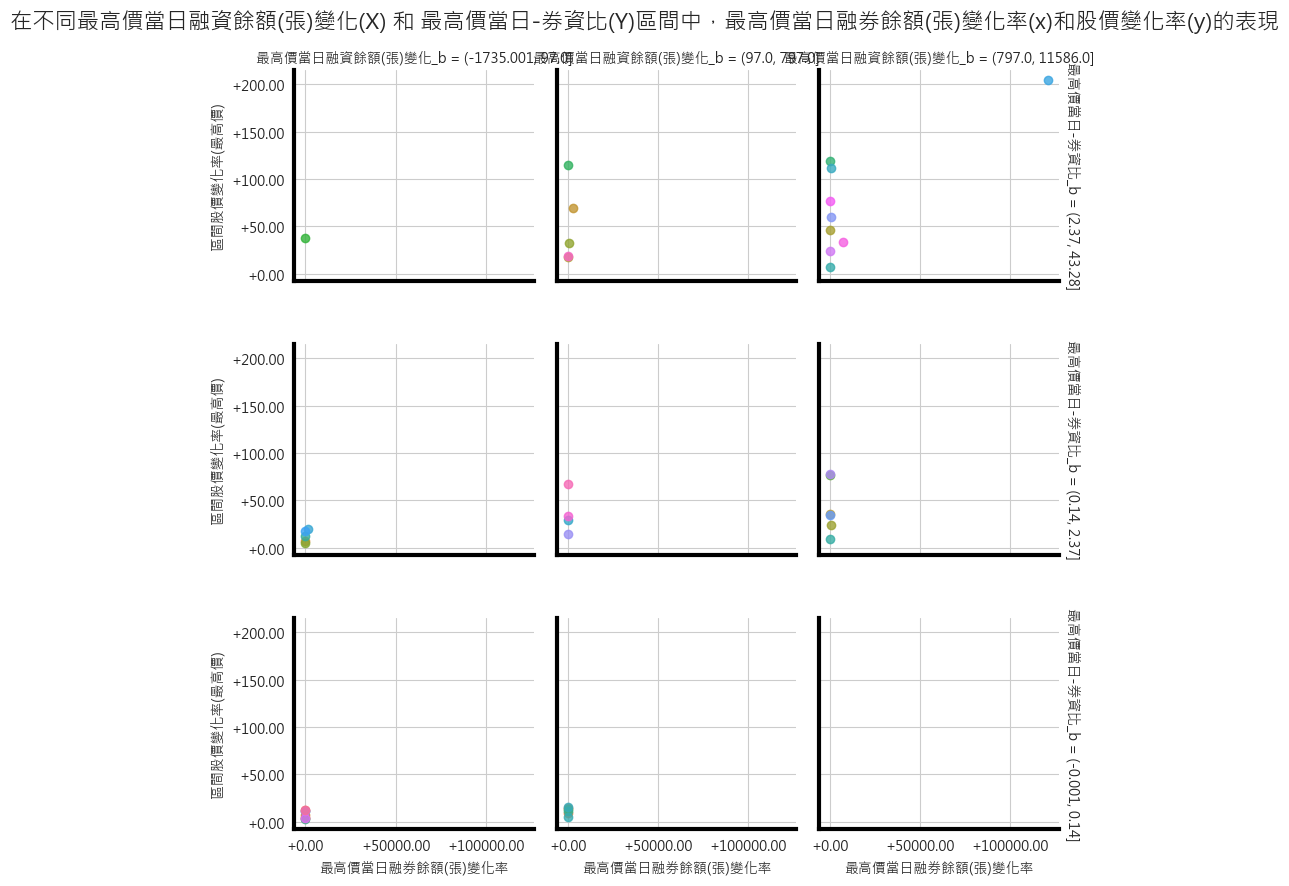

最高價當日-券資比_b
最高價當日融券餘額(張)變化率_b


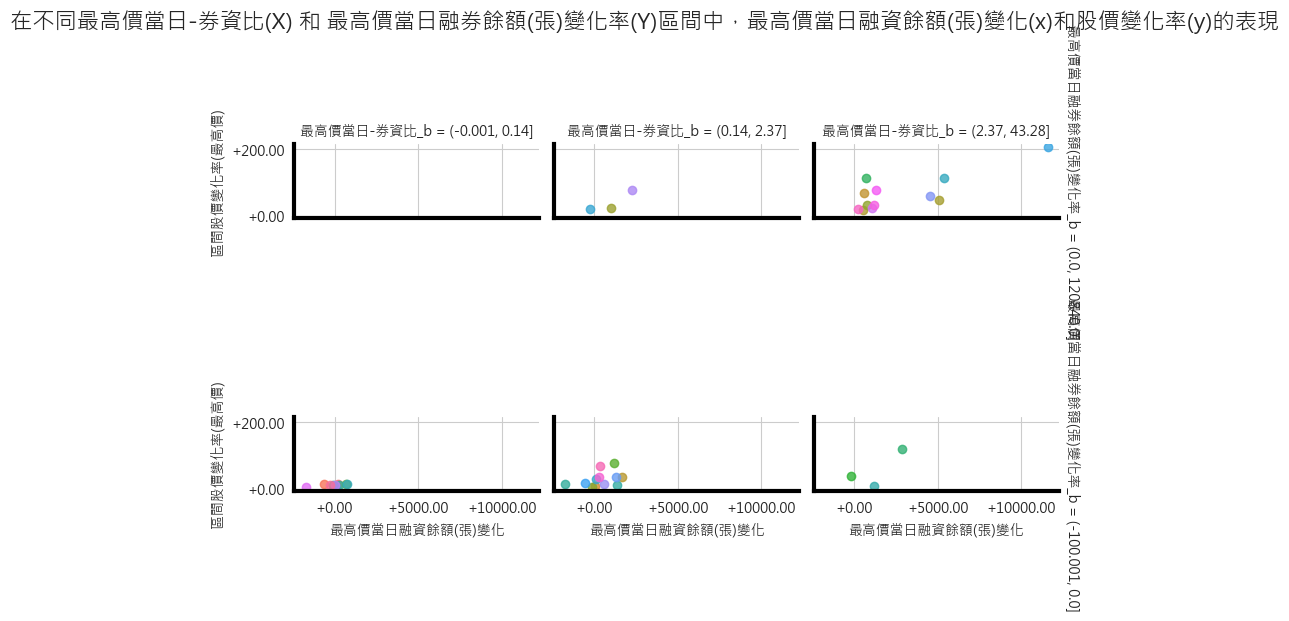

最高價當日融券餘額(張)變化率_b
最高價當日融資餘額(張)變化_b


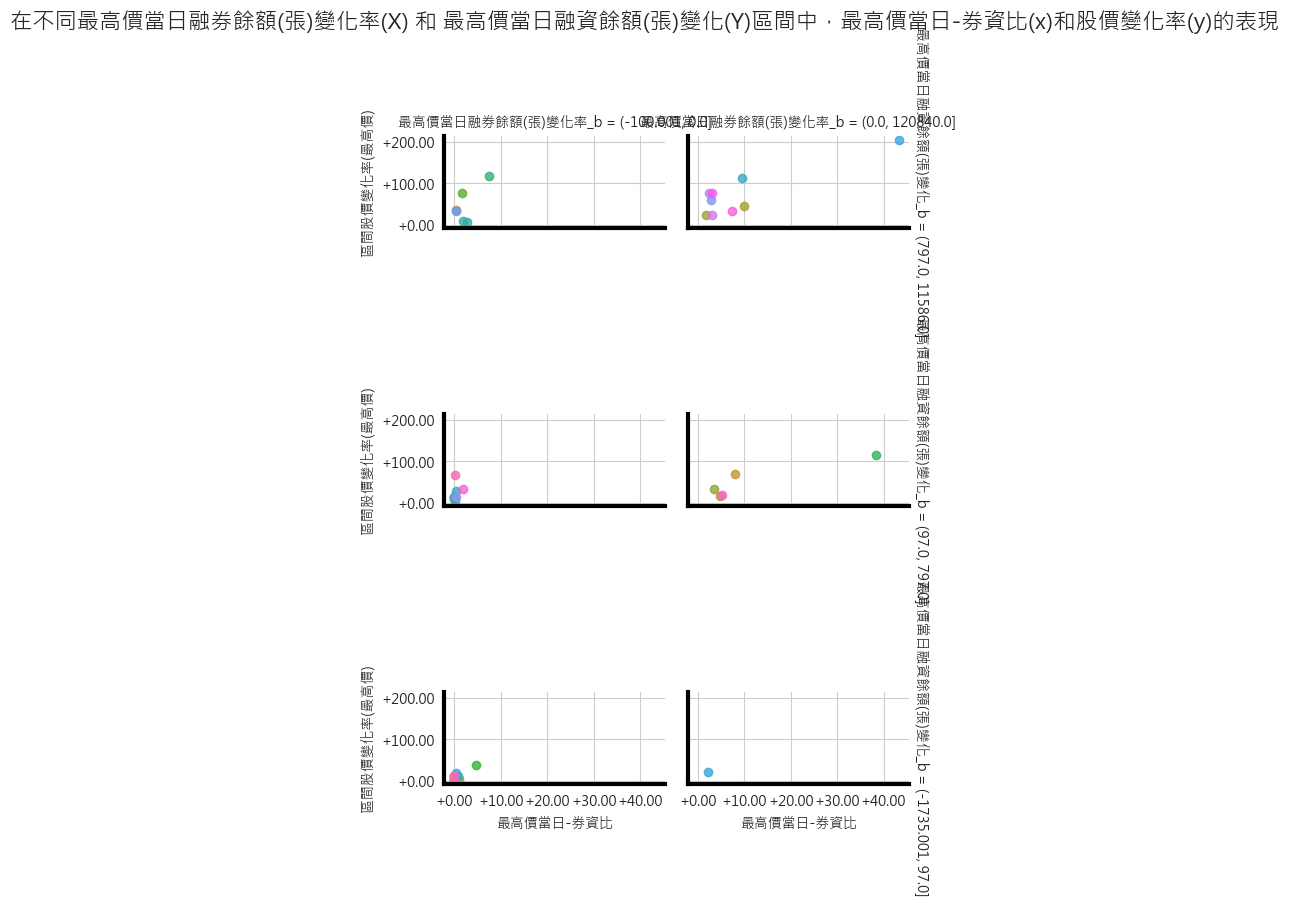

最高價當日融資餘額(張)變化_b
最高價當日-融券餘額(張)_b


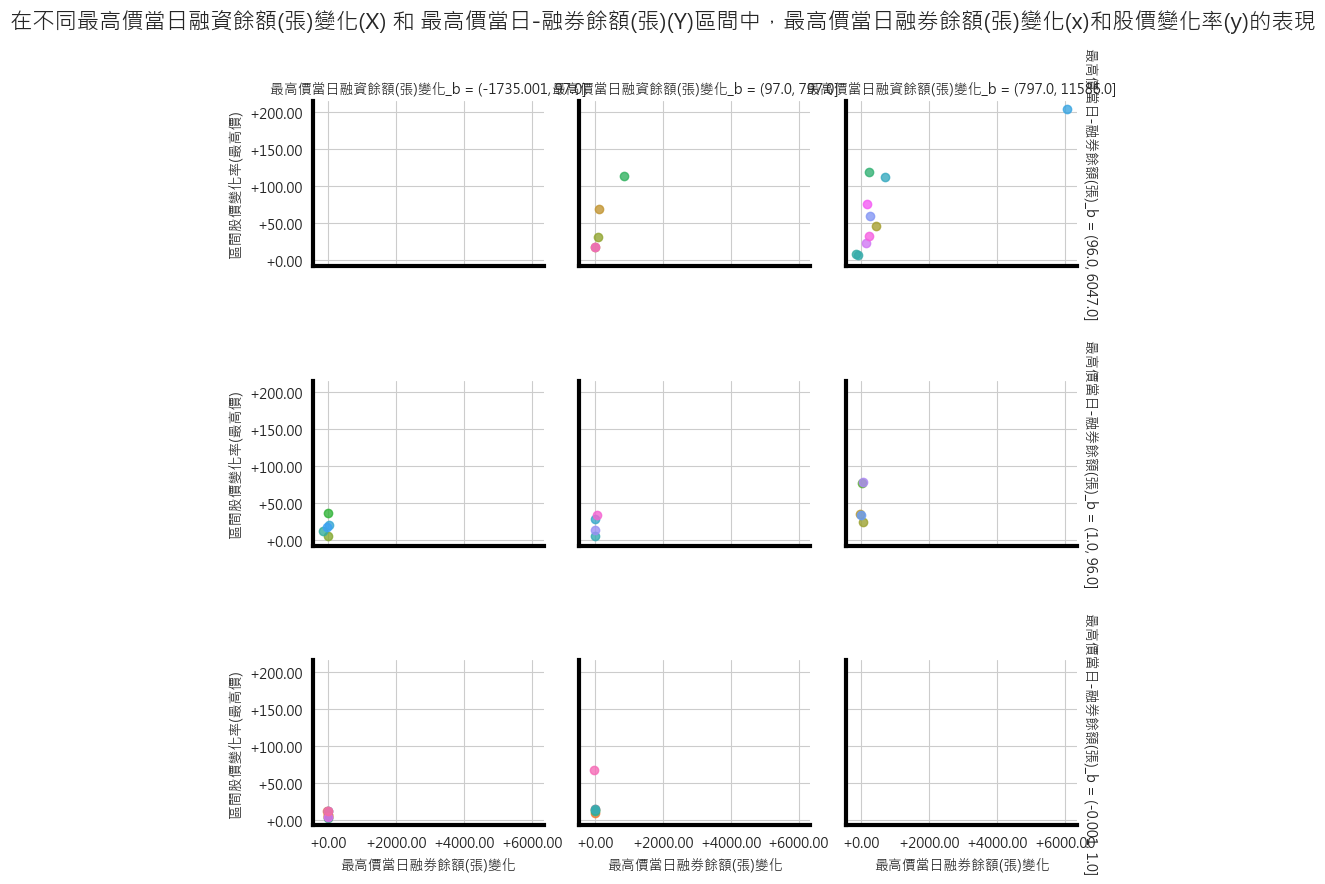

最高價當日-融券餘額(張)_b
最高價當日融券餘額(張)變化_b


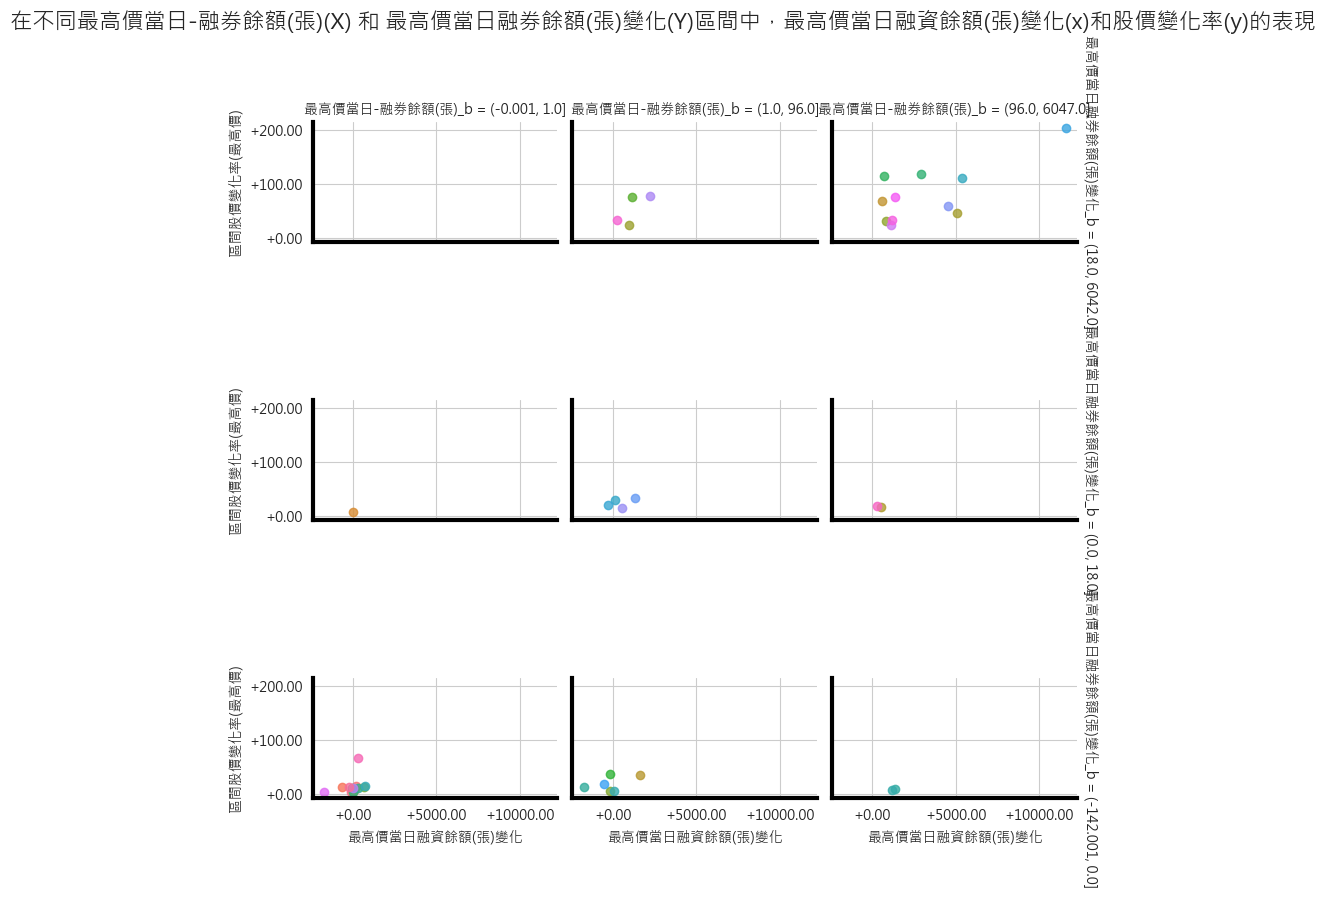

最高價當日融券餘額(張)變化_b
最高價當日融資餘額(張)變化_b


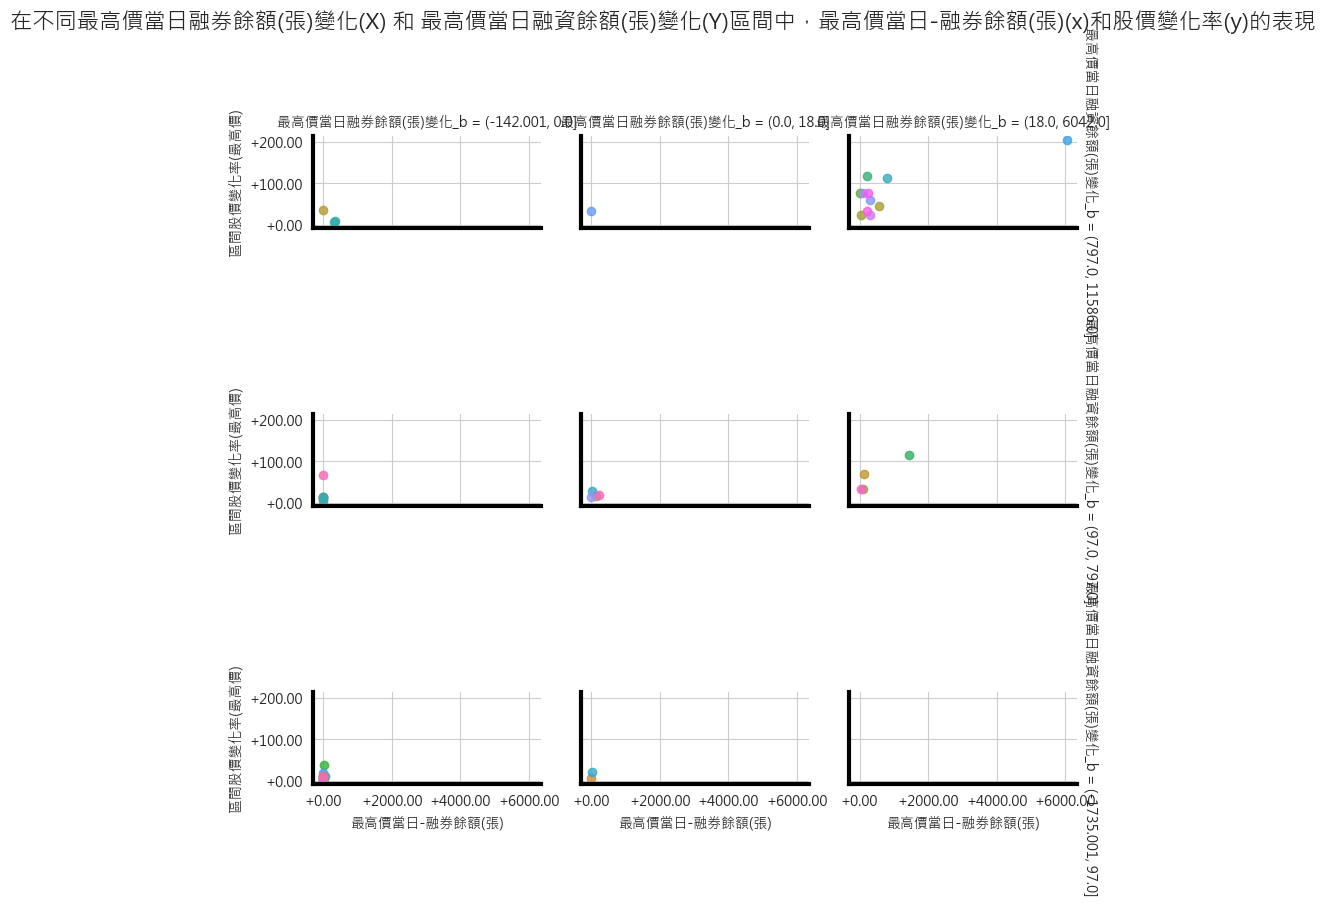

最高價當日融資餘額(張)變化_b
最高價當日-融券餘額(張)_b


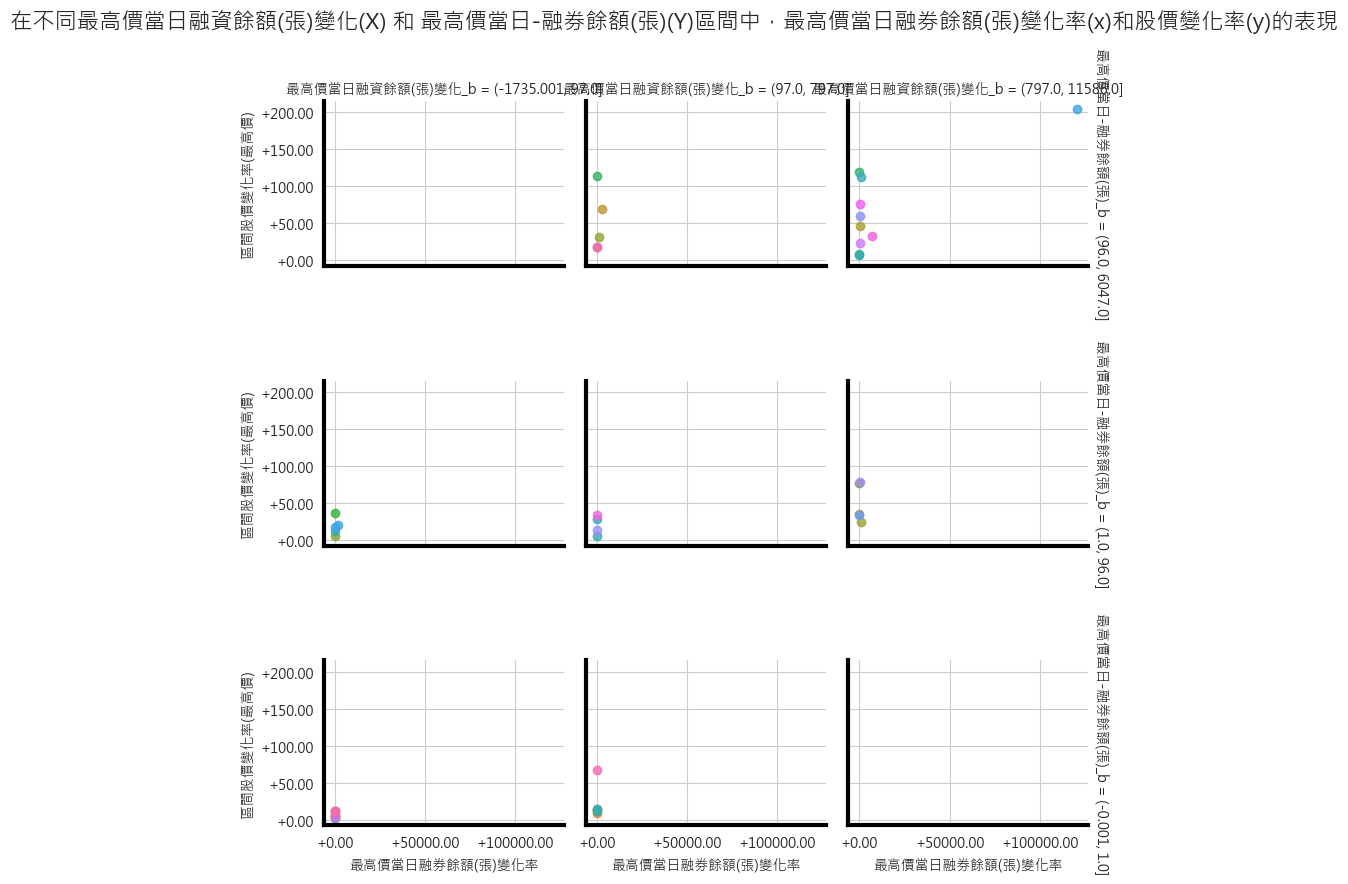

最高價當日-融券餘額(張)_b
最高價當日融券餘額(張)變化率_b


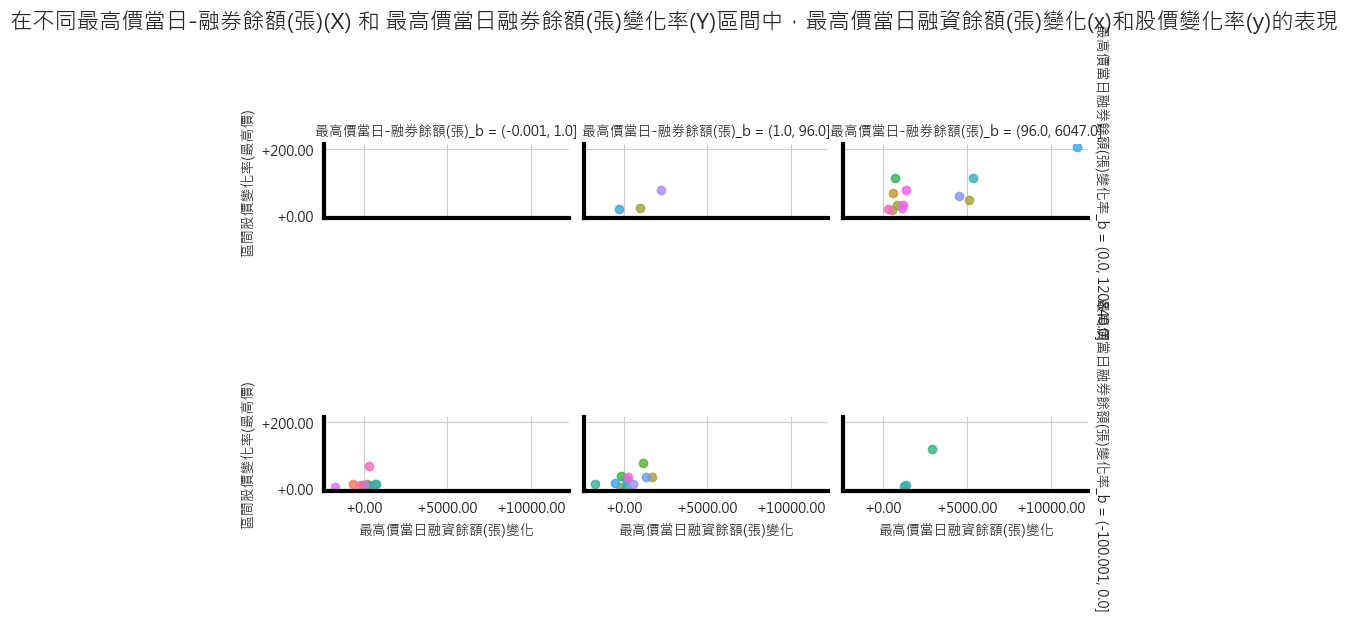

最高價當日融券餘額(張)變化率_b
最高價當日融資餘額(張)變化_b


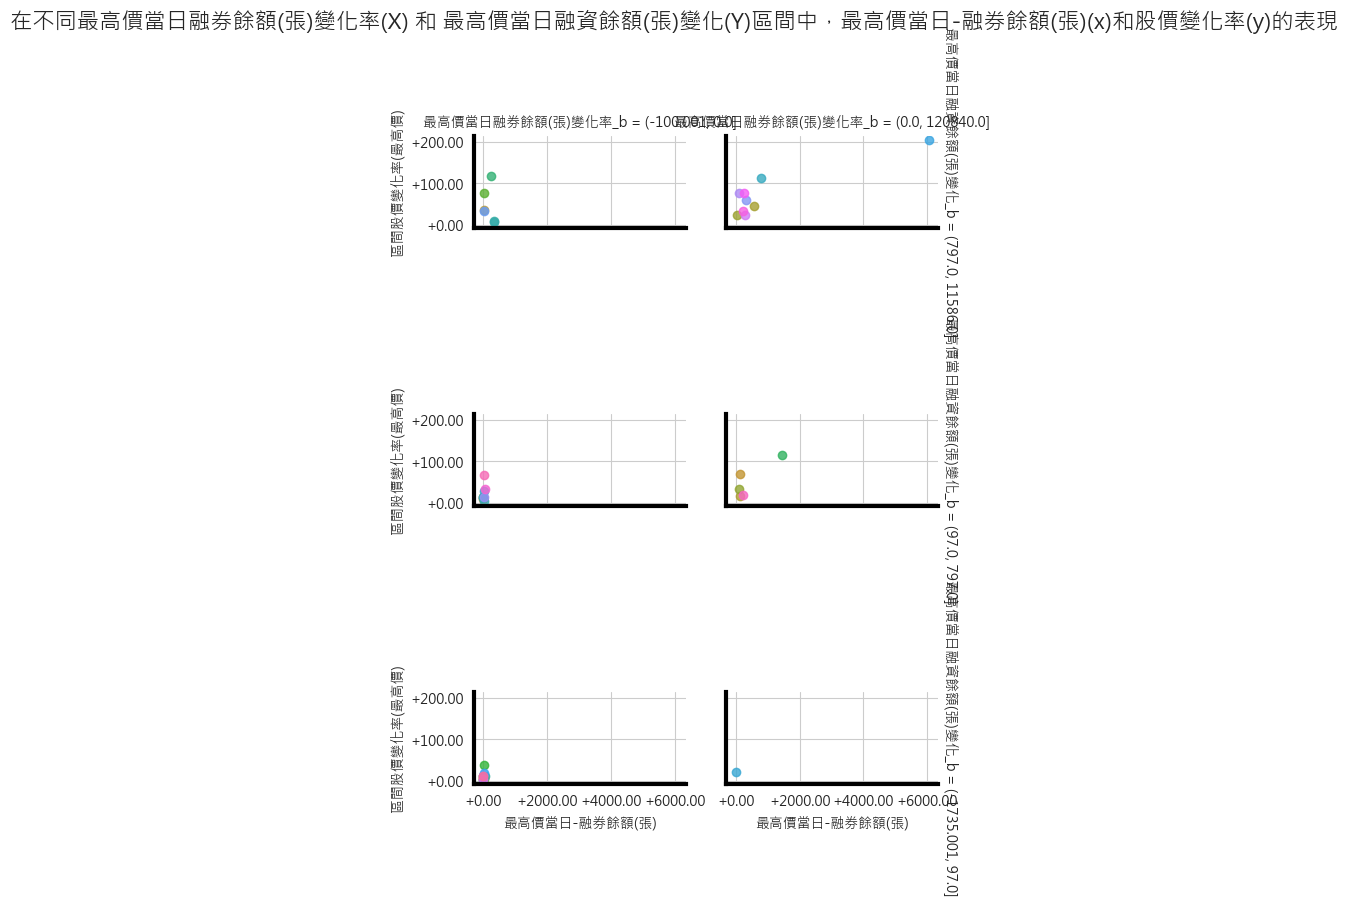

最高價當日融資餘額(張)變化_b
最高價當日融券餘額(張)變化_b


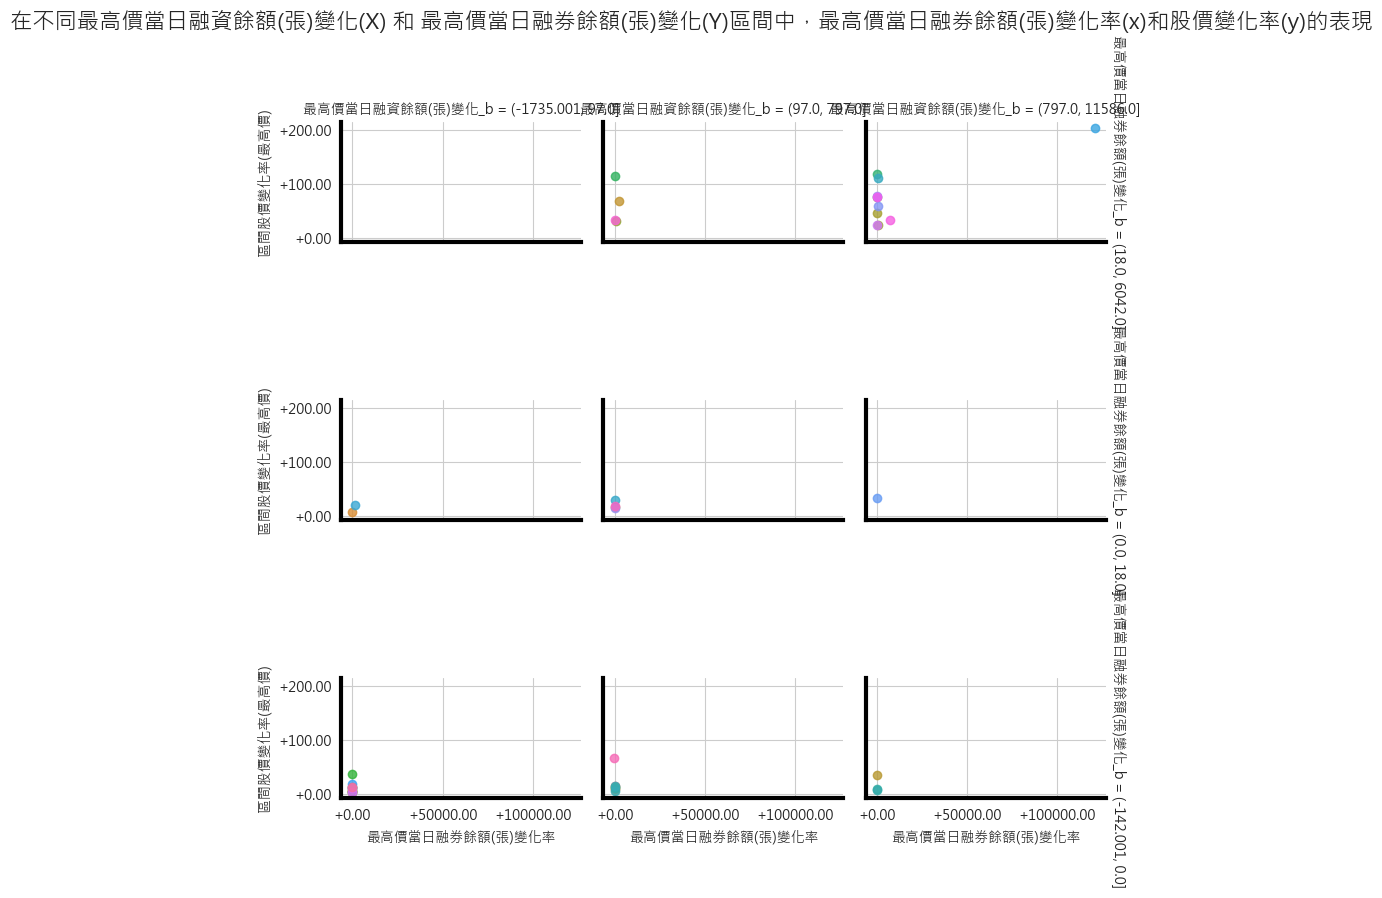

最高價當日融券餘額(張)變化_b
最高價當日融券餘額(張)變化率_b


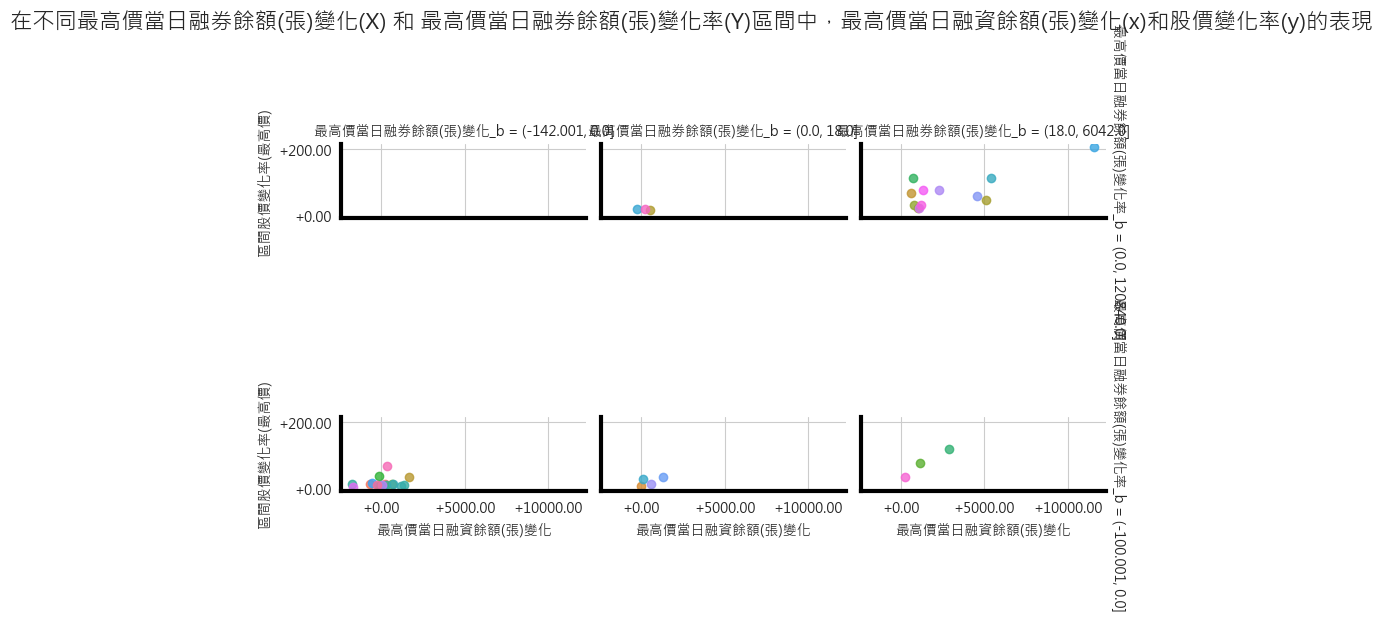

最高價當日融券餘額(張)變化率_b
最高價當日融資餘額(張)變化_b


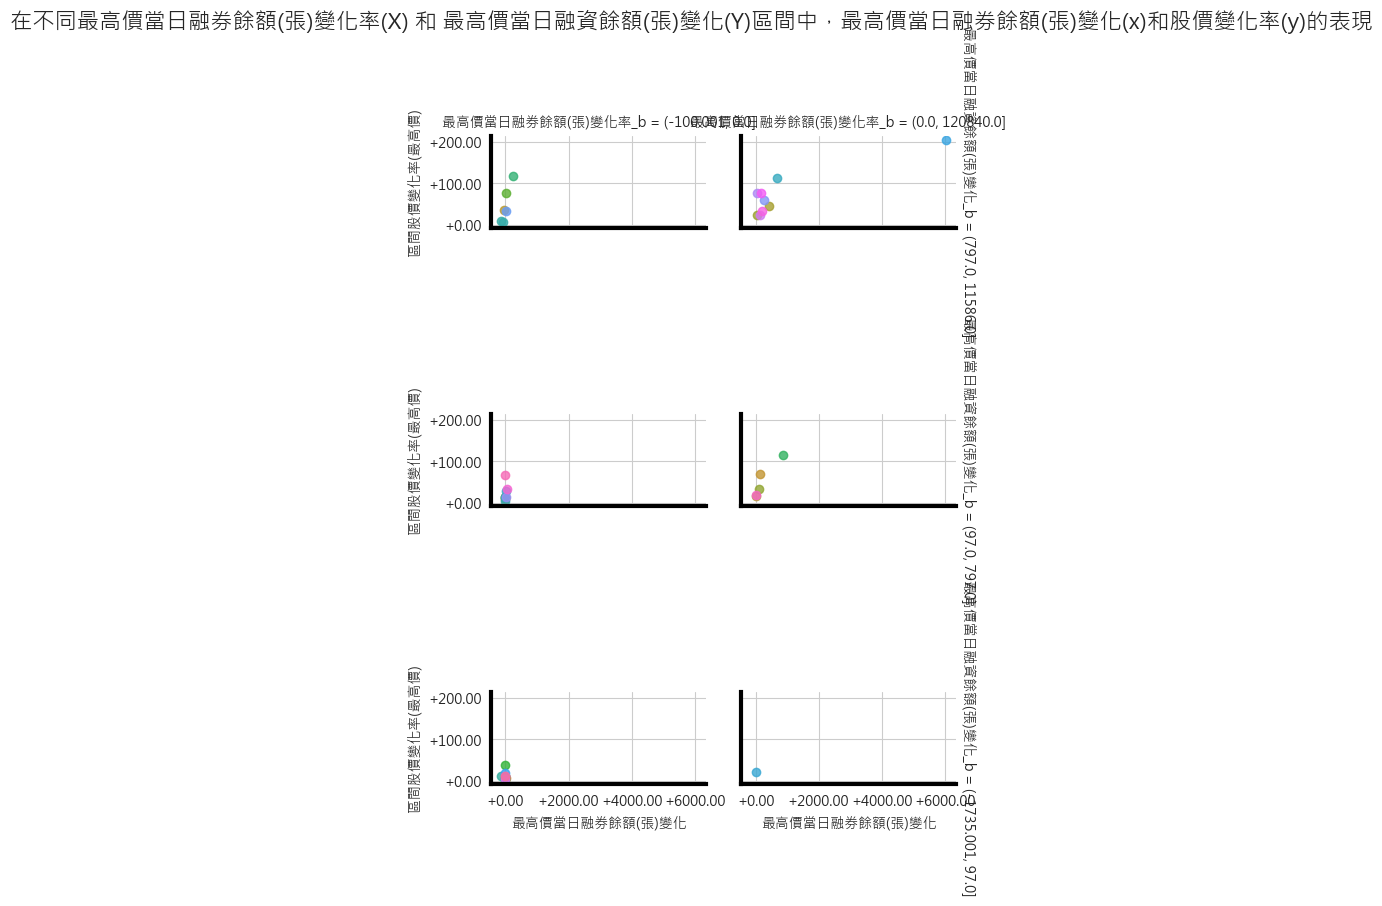

最高價當日-券資比_b
最高價當日-融券餘額(張)_b


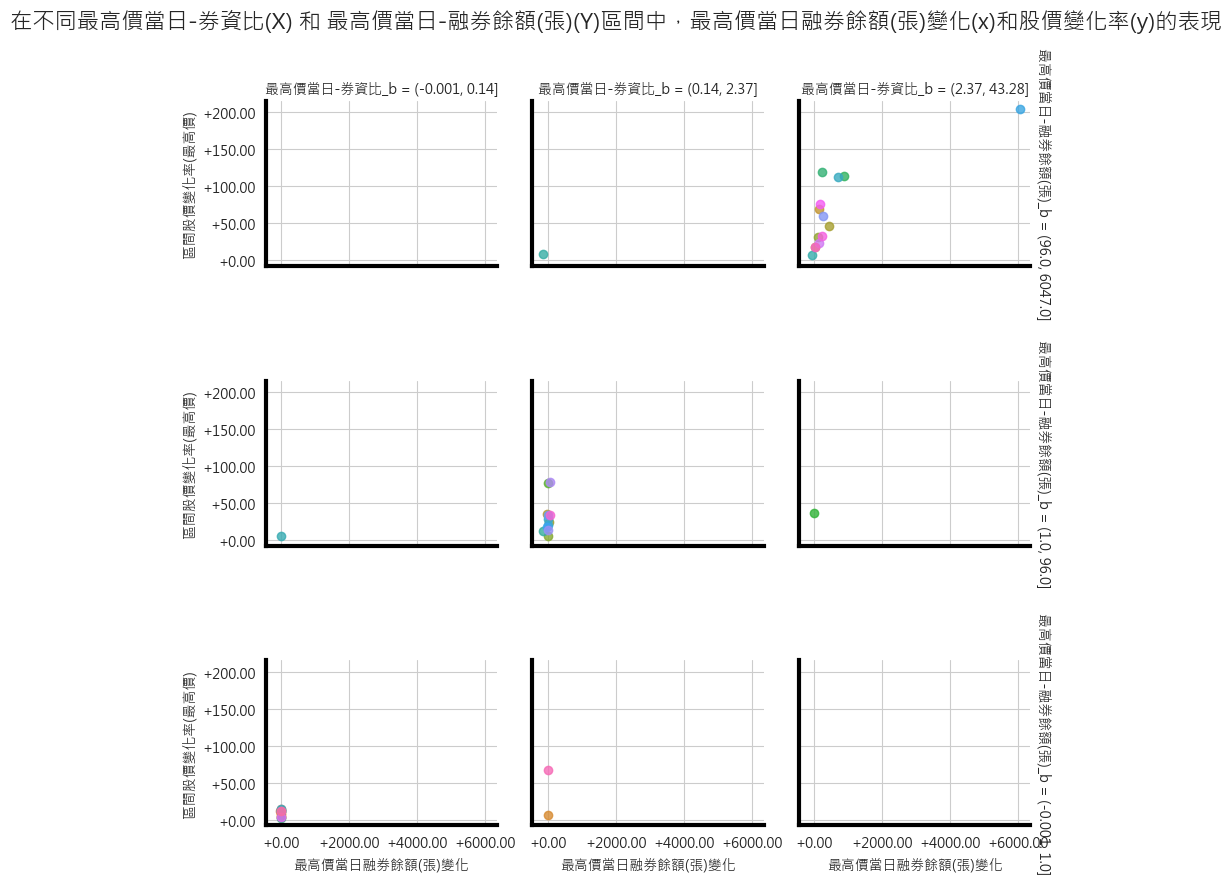

最高價當日-融券餘額(張)_b
最高價當日融券餘額(張)變化_b


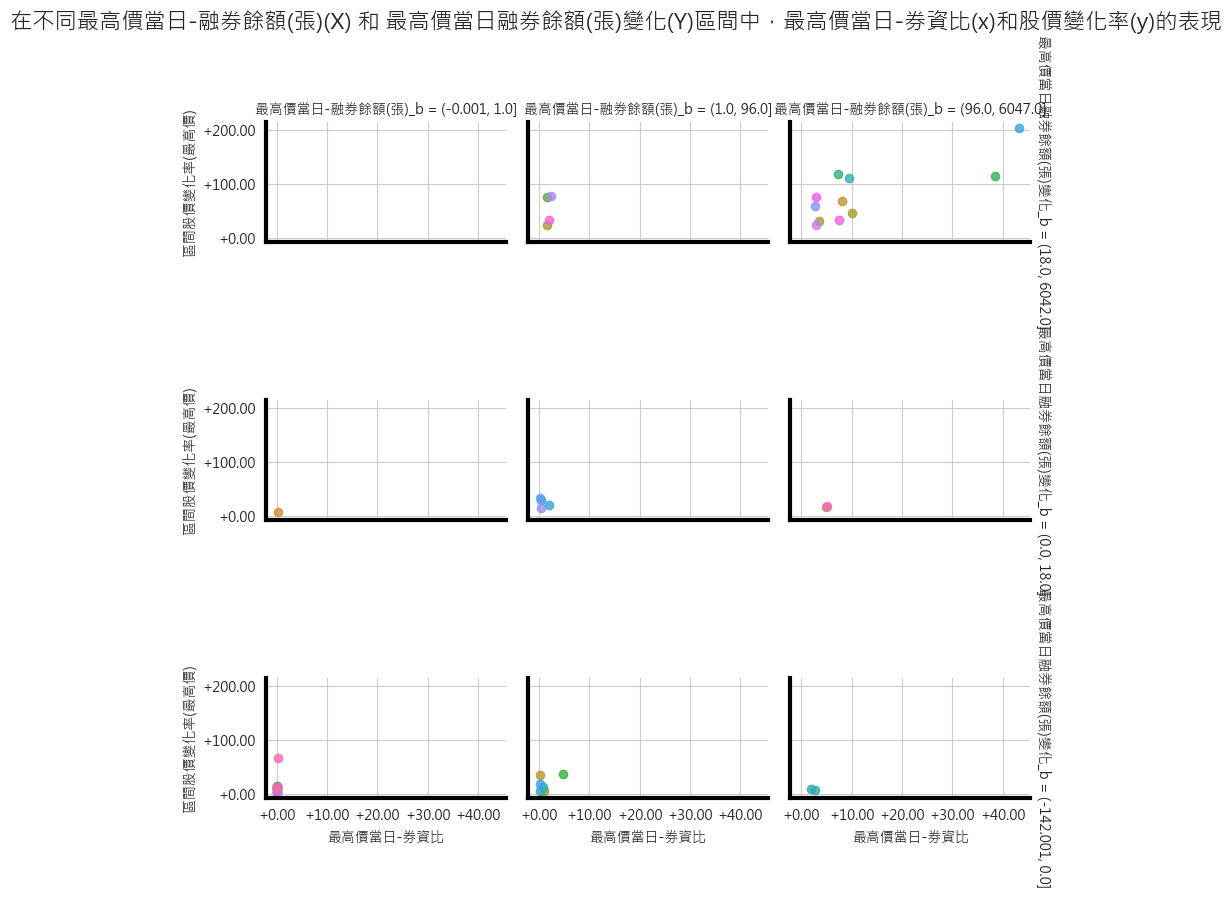

最高價當日融券餘額(張)變化_b
最高價當日-券資比_b


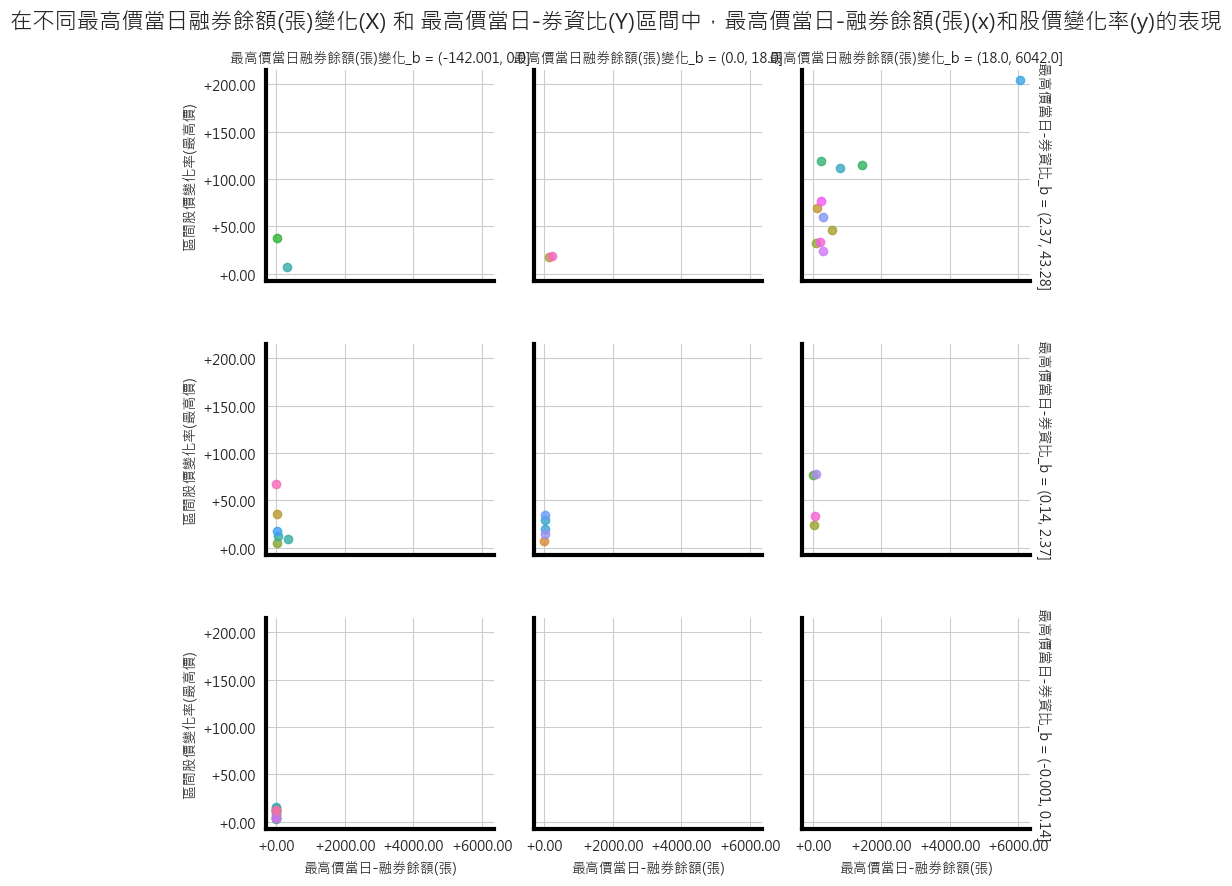

最高價當日-券資比_b
最高價當日-融券餘額(張)_b


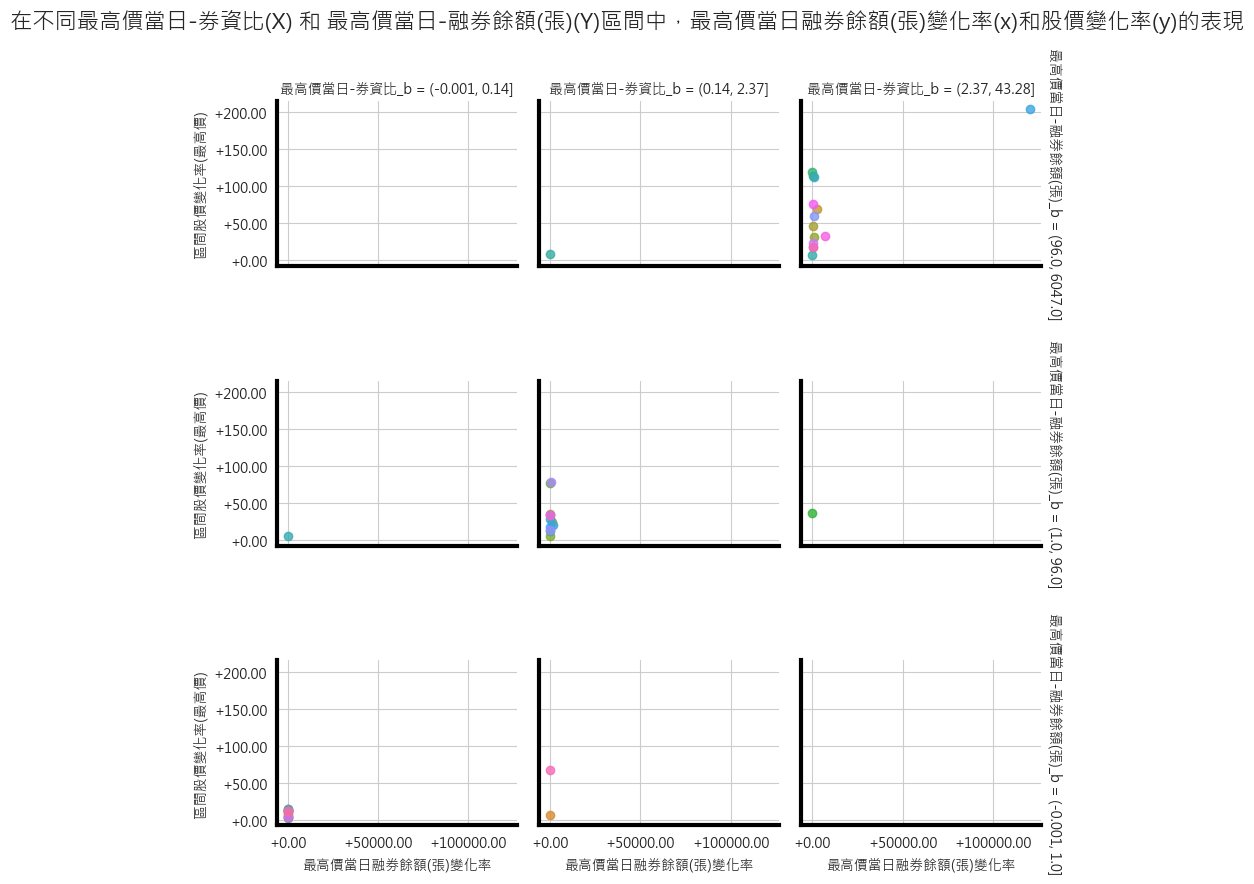

最高價當日-融券餘額(張)_b
最高價當日融券餘額(張)變化率_b


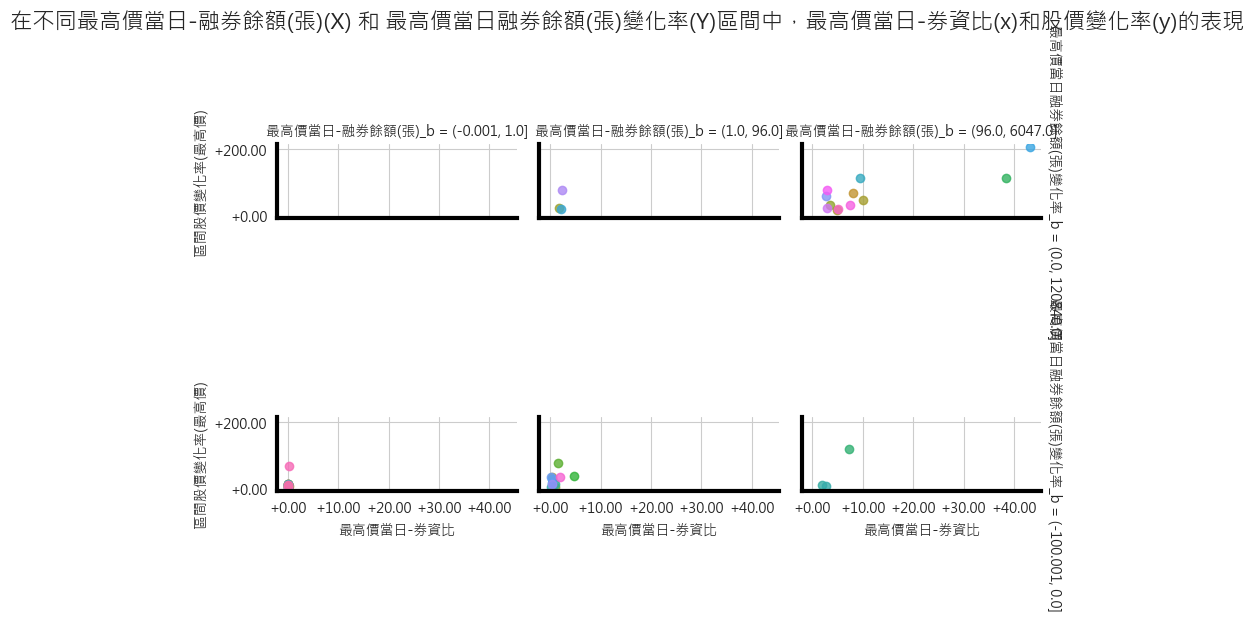

最高價當日融券餘額(張)變化率_b
最高價當日-券資比_b


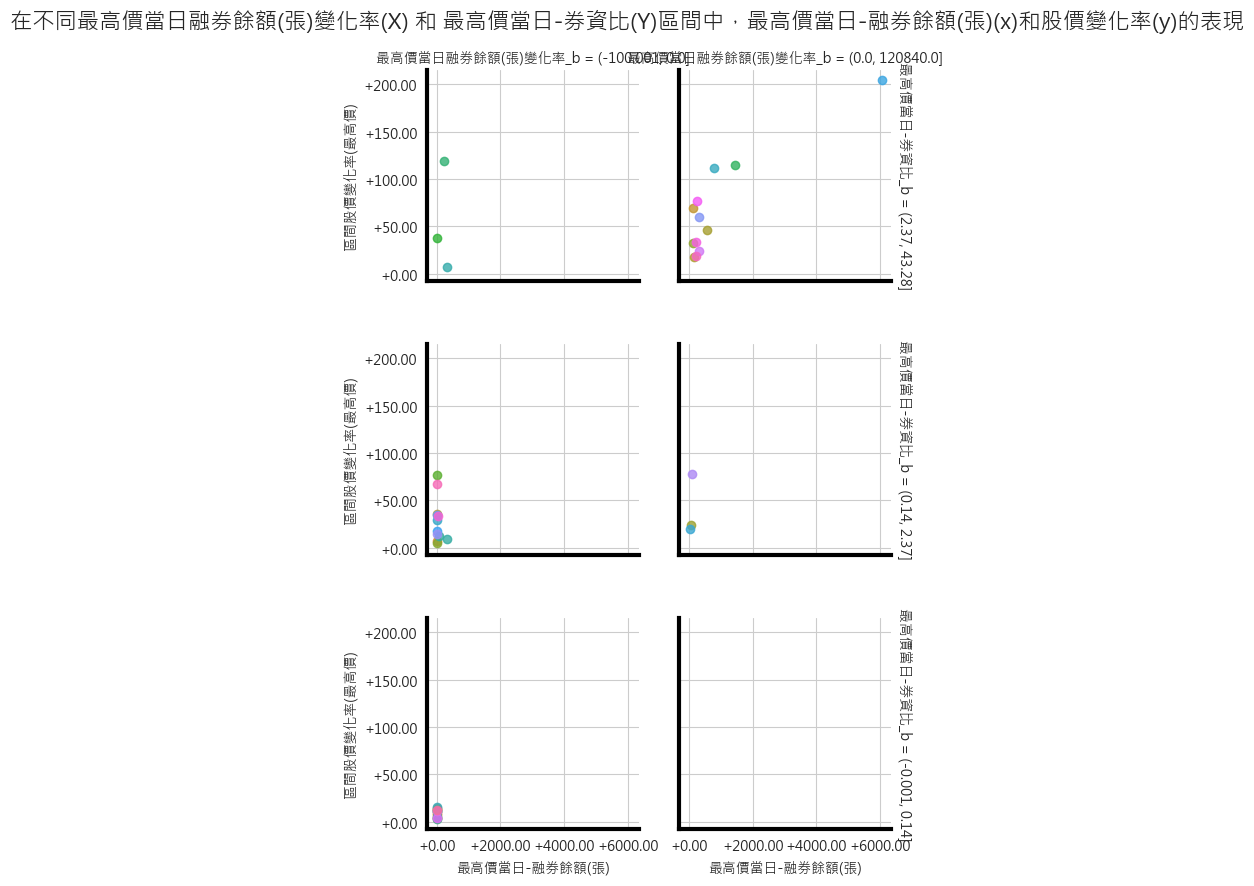

最高價當日-券資比_b
最高價當日融券餘額(張)變化_b


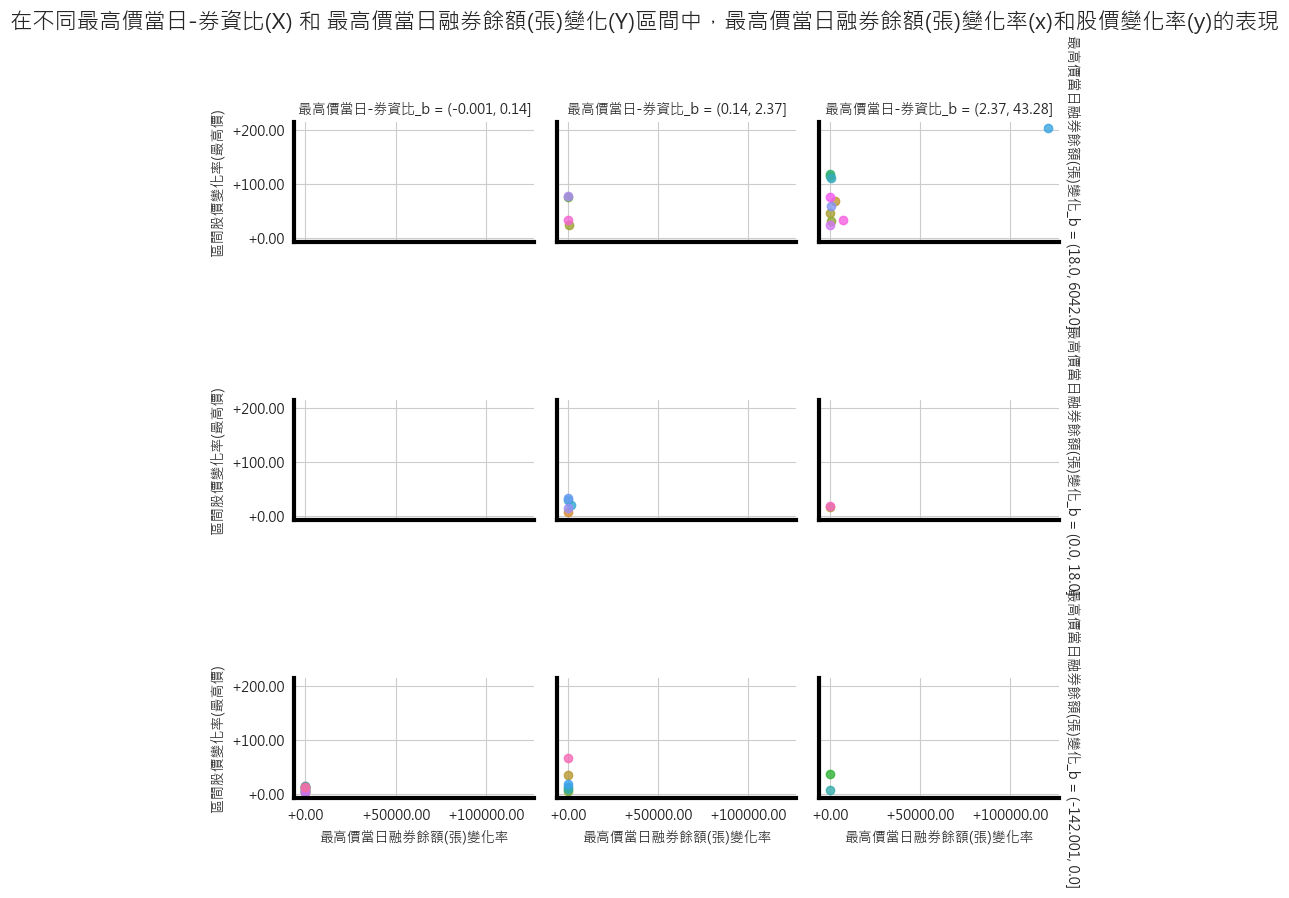

最高價當日融券餘額(張)變化_b
最高價當日融券餘額(張)變化率_b


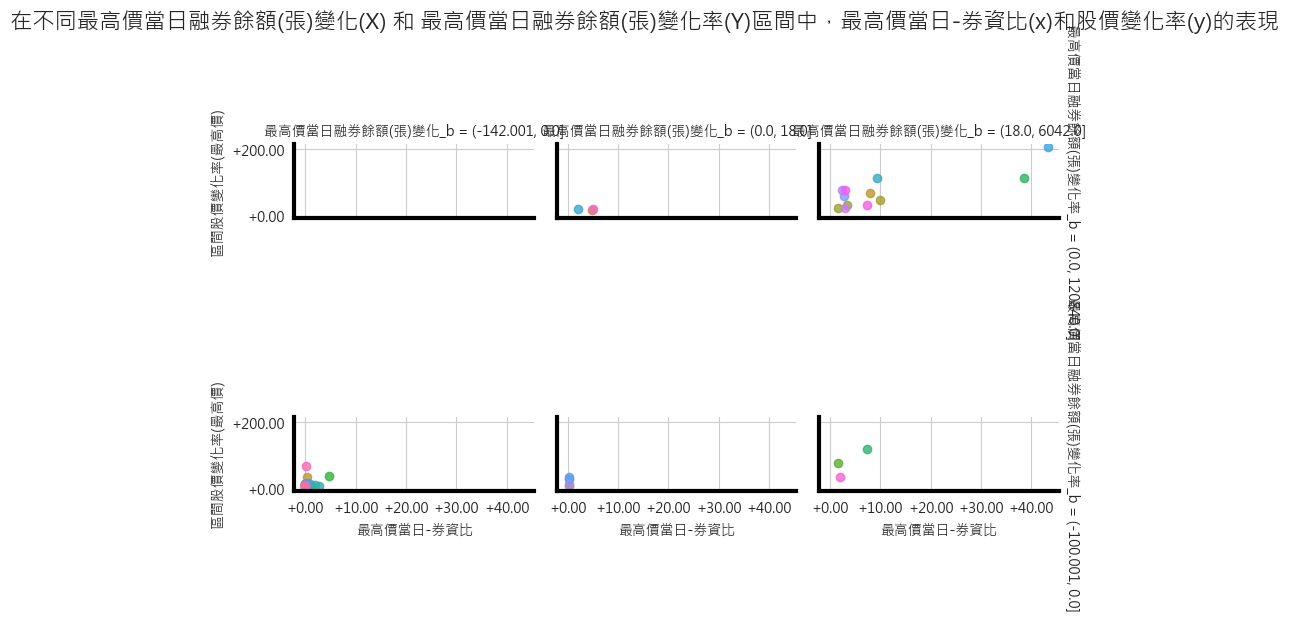

最高價當日融券餘額(張)變化率_b
最高價當日-券資比_b


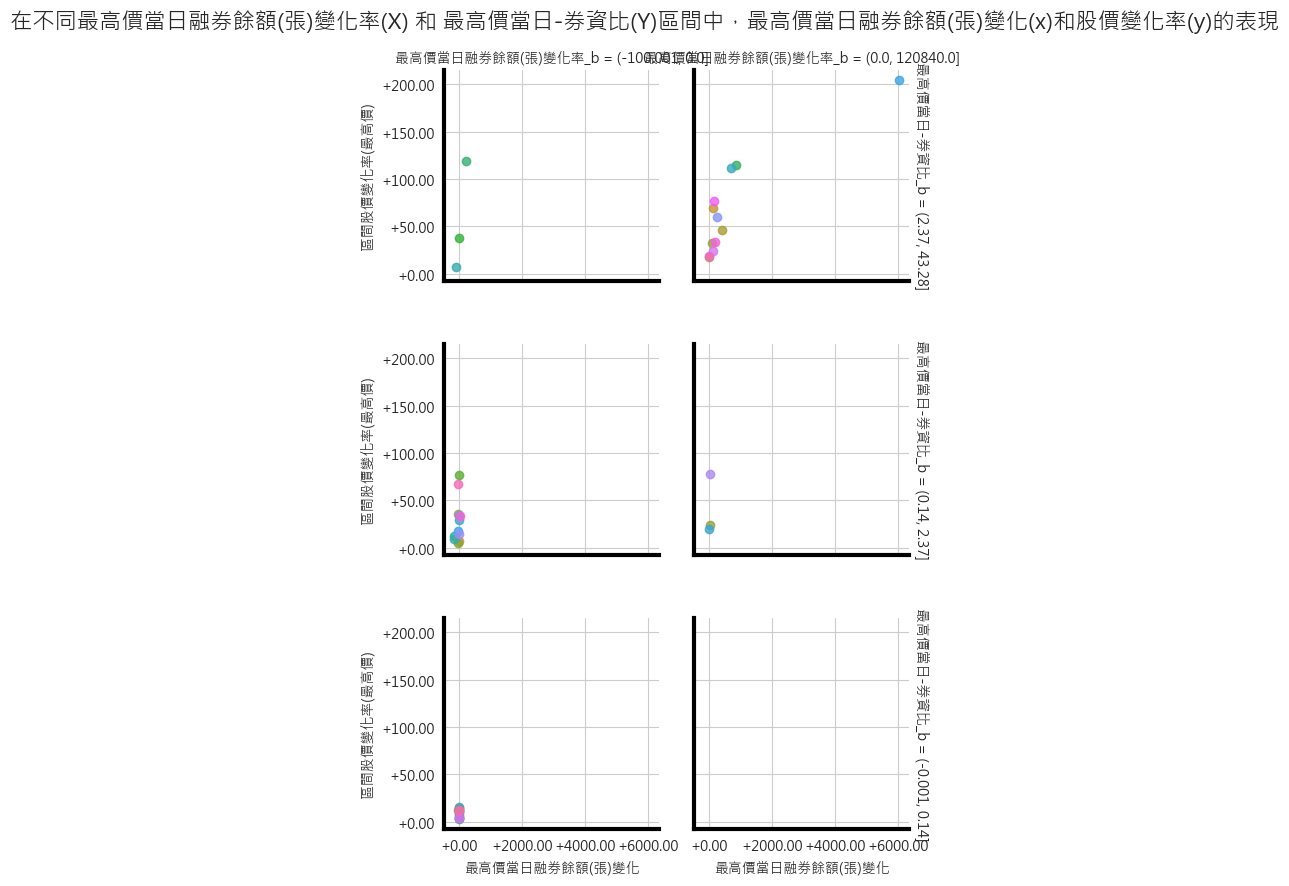

最高價當日-融券餘額(張)_b
最高價當日融券餘額(張)變化_b


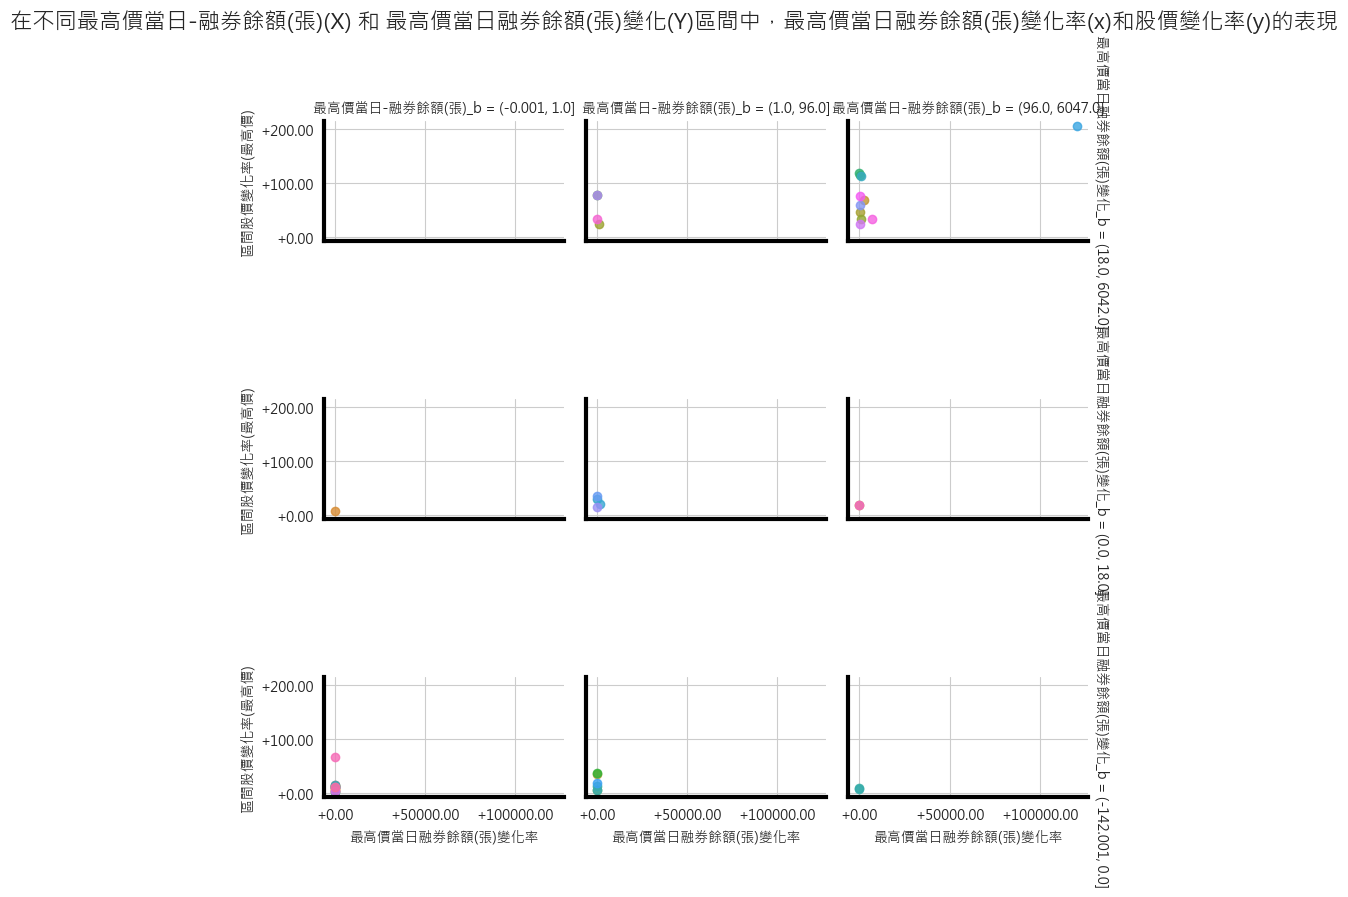

最高價當日融券餘額(張)變化_b
最高價當日融券餘額(張)變化率_b


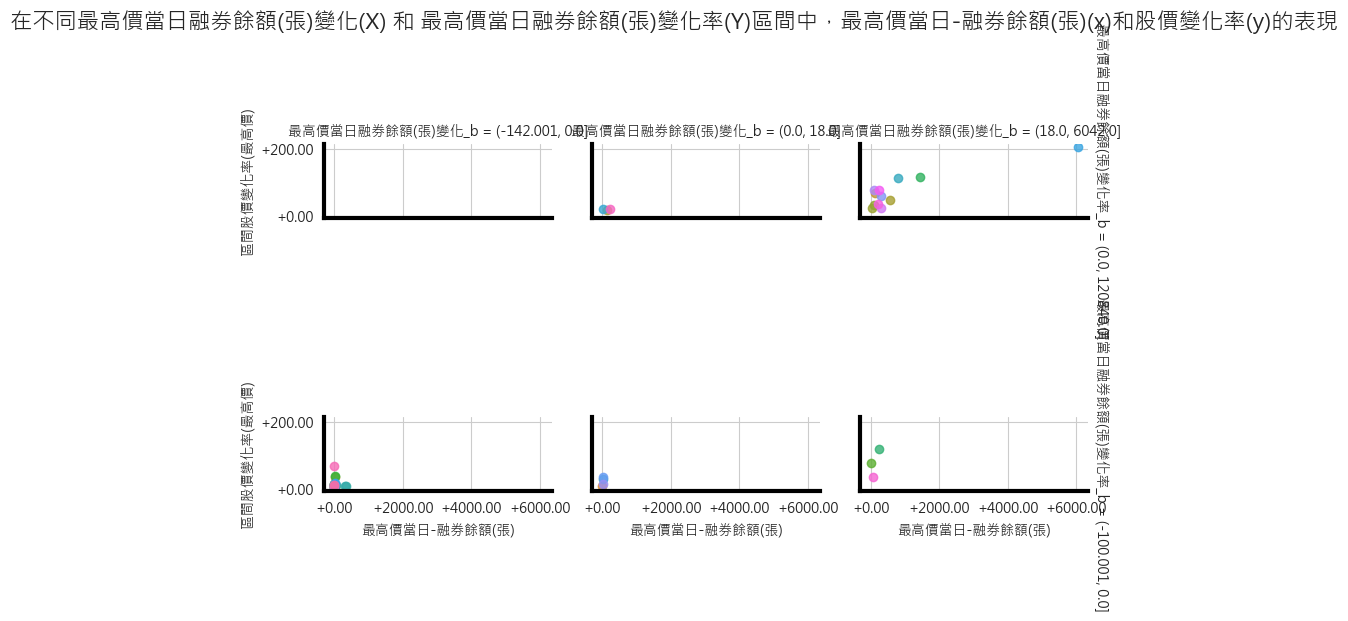

最高價當日融券餘額(張)變化率_b
最高價當日-融券餘額(張)_b


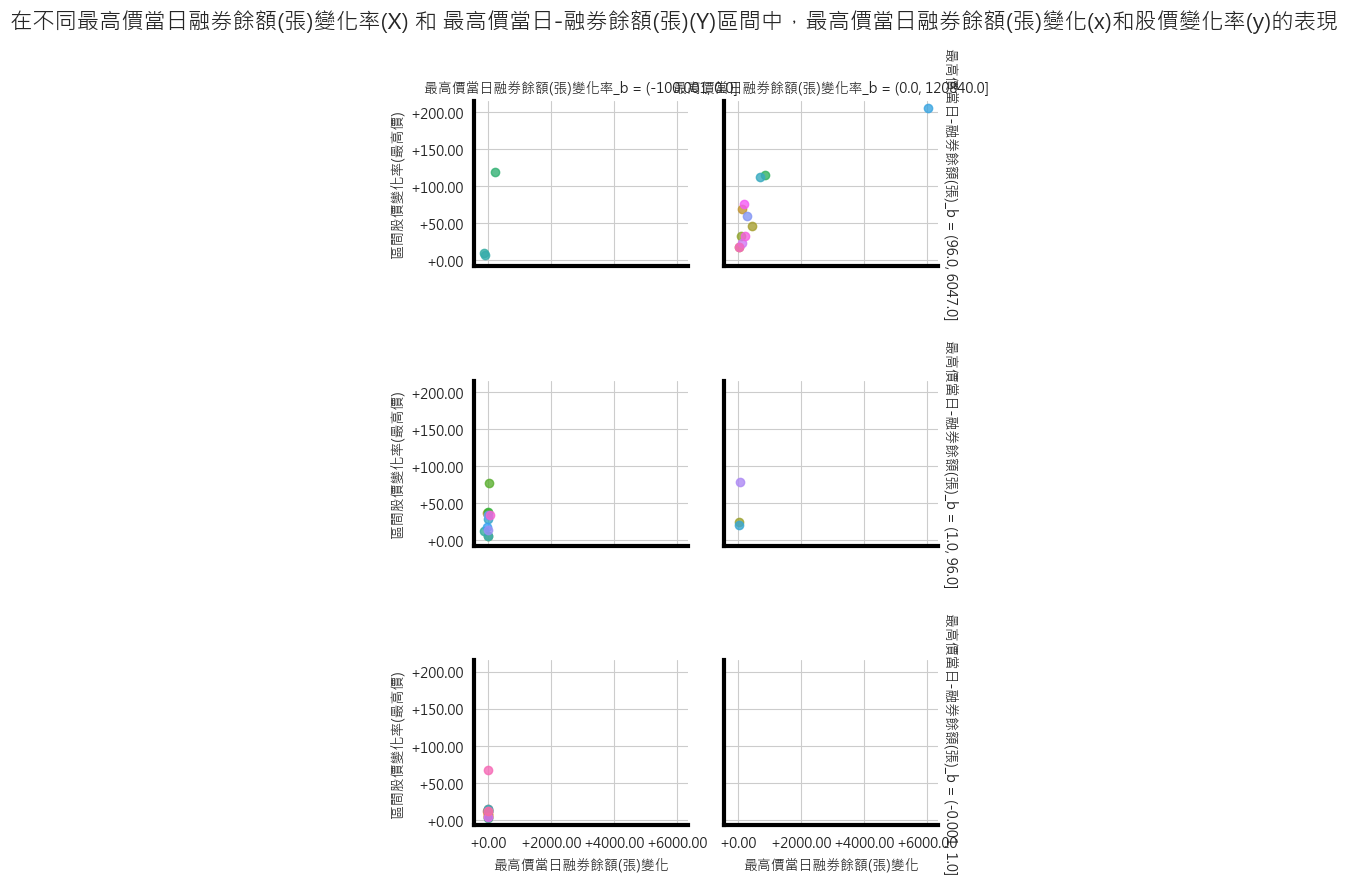

所有圖表已保存到 output_plots.pdf


In [9]:
F_Draw(filtered_data,features)